In [1]:
#Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to view all the columns and rows
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
#Acquiring the dataset
data_train=pd.read_csv("Housing_Train_Data.csv")  #Reading the train data set
data_test=pd.read_csv("Housing_Test_Data.csv") #Reading the test data set
#data.head(10)  #fetching the first 10 entries of train data

By looking at the overview of the rawdata, we can infer that 

    >there are a lot of Nan or missing values
    >there are many continous type data columns
    >the target variable SalePrice is continous numerical type 

In [4]:
data_train.shape, data_test.shape #fetching the shape of the data

((1168, 81), (292, 80))

The Train data has 1168 rows and 81 columns and the test data has 292 rows and 80 columns. Lets combine the train and test data for data analysis. Test data does not have the target column 'SalePrice', Lets add this column to test data and merge it with train data.

In [5]:
from numpy import NaN

data_test['SalePrice']=NaN

data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,NaN
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,NaN
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,NaN
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN


Lets Combine the data and add Flag(Train/Test) column to identify Train and test data later.

In [6]:
data=data_train.append(data_test)
data["Flag(Train/Test)"]=np.where(data["SalePrice"].isnull(),0,1) 

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Flag(Train/Test)
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,1
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,1
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,1
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,1
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,1


In [7]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Flag(Train/Test)
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN,0
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN,0
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN,0
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN,0
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,408.0,TA,TA,CBlock,TA,Fa,No,BLQ,309,Unf,0,174,483,GasA,TA,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1973.0,Unf,1,264,TA,TA,Y,72,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0


###### Data Analysis

In [8]:
data.info() #Checking the data type and the Non Null count by using info() method

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1201 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   Alley             91 non-null     object 
 7   LotShape          1460 non-null   object 
 8   LandContour       1460 non-null   object 
 9   Utilities         1460 non-null   object 
 10  LotConfig         1460 non-null   object 
 11  LandSlope         1460 non-null   object 
 12  Neighborhood      1460 non-null   object 
 13  Condition1        1460 non-null   object 
 14  Condition2        1460 non-null   object 
 15  BldgType          1460 non-null   object 
 16  HouseStyle        1460 non-null   object 
 

The Train data set has 39 numeric data columns including the  and 42 object type data columns. numeric data columns may contain continous or categorical data types which will be seperated later.

###### Statistical Summary

Lets look into the statistical summary of the data by describing it

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Flag(Train/Test)
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993,0.800000
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863,0.400137
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000,1.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000,1.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000


stats above shows us there are outliers in the numeric type data and also the data is skewed

In [10]:
data.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Here we can see how many unique values are present in the categorical columns, what is the value that appear most frequently and also the frequency of the most frequent value.

###### Checking if there is any duplicate entries

In [11]:
data.duplicated().sum()  # Checking if there is any duplicate entries

0

In [12]:
#data.duplicated().any()

There is no duplicate entries in the data set

###### Checking for Missing/Null Values:

In [13]:
data.isnull().sum()  #fetching the number of null values from each of the columns

Id                     0
MSSubClass             0
MSZoning               0
LotFrontage          259
LotArea                0
Street                 0
Alley               1369
LotShape               0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             8
MasVnrArea             8
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual              37
BsmtCond              37
BsmtExposure          38
BsmtFinType1          37
BsmtFinSF1             0
BsmtFinType2          38
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0


In [14]:
data.columns[data.isnull().any()] #fetching only the columns which has null values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

Out of 80 feature columns, 19 feature columns has null values. Lets check the count of the null values

In [15]:
missing=data.isnull().sum()*100/len(data) #fetching the % of missing values
missing=missing[missing>0] #only greater than 0 misisng values
missing

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
SalePrice       20.000000
dtype: float64

In [16]:
missing.sort_values(ascending=False) #Sorting the values

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
SalePrice       20.000000
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

PoolQC has 99.5% of missing values followed by MiscFeature, Alley, Fence, FireplaceQu. Lets visualize this view.

In [17]:
#help(missing.to_frame())

In [18]:
#missing is a series and the column names are indexes. lets convert this to a dataframe
missing=missing.to_frame()

In [19]:
missing.columns=['missing%']
missing.index.names=['missing_col']
missing['missing_col']=missing.index

In [20]:
#help(sns.barplot)

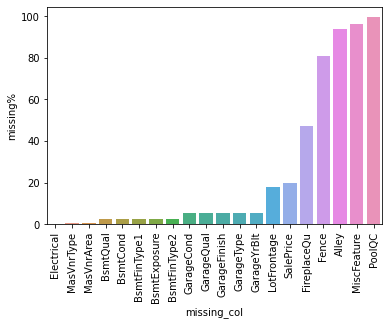

In [21]:
#Lets plot a bar graph to view the missing values better.  
sns.barplot(x='missing_col', y='missing%', data=missing.sort_values(by='missing%'))
plt.xticks(rotation=90)
plt.show()

Now we can clearly see the highest number of missing values from the column PoolQC followed by MiscFeature, Alley, Fence, FireplaceQu.

###### Numeric Variables

Now lets devide our data into numeric and categorical values and explore the data and to identify the correlation between the target variable and the feature variable.

In [22]:
numeric_tr=data_train.select_dtypes(include=np.number)
categorical_tr=data_train.select_dtypes(include='object')

In [23]:
numeric_tr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,215000


In [24]:
#Lets delete the Id column from numeric_tr
numeric_tr.drop(['Id'], axis=1, inplace=True)

C:\Users\ak38\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
numeric_tr.shape

(1168, 37)

Now lets explore the correlation between the numeric data. Out of 37 columns, some of the columns should be highly correlated with the targer variable, some of them will have no correlation. Lets look into it in detail.

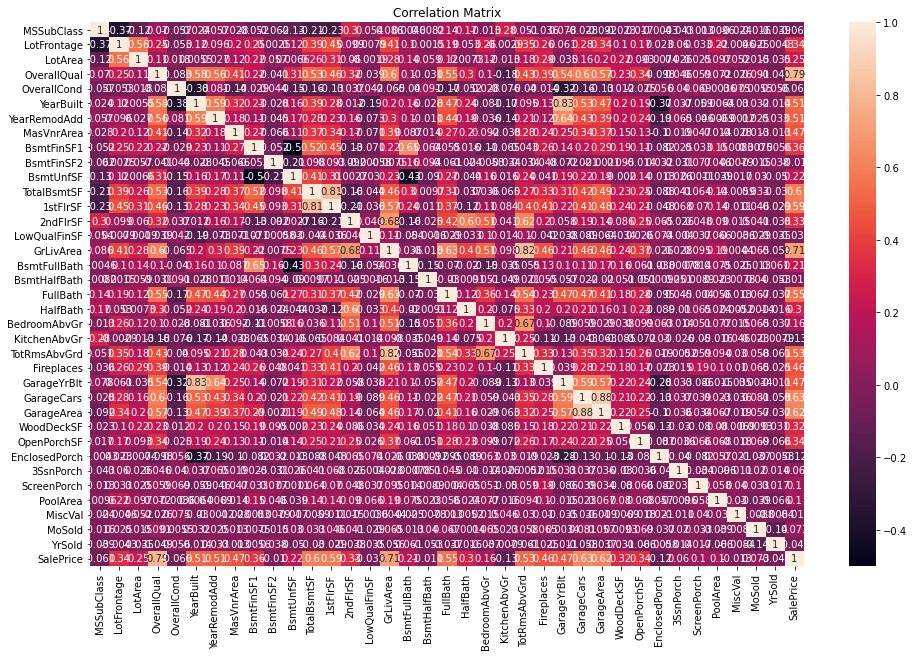

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(numeric_tr.corr(method='pearson'), annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

As there is more number of features its impossible to infer which feature is highly correlated with target variable so lets display the correlation values of the target value with the features values in a sorted order.

In [27]:
cor_mat=numeric_tr.corr()
cor_mat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

OverallQual, GrLivArea are highly correlated with the saleprice that is 79% and 71% respectively. Well, this makes sense.
OverallQual is nothing but the overall quality of the house, everyone will look into this feature when they buy one. 
GrLivArea is Above grade (ground) living area square feet. GarageCars and GarageArea are Size of garage in car capacity and Size of garage in square feet, the correlation is 63% and 62% respectively. 
TotalBsmtSF is Total square feet of basement area which has 60% correlation with the dependent variable.

In [28]:
numeric_tr['OverallQual'].value_counts()

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

The OverallQual has 10 rating values, 5 is most frequest value follwed by 6,7,8. These are Average, above average, good and very good rating values. 
9 and 10 appears less frequently being excellent and very excellent due to the higher cose of the houses.
1,2,3,4 are poor and below average rated houses which are sold very less due to the quality of the house.


In [29]:
qual=numeric_tr['SalePrice'].groupby(numeric_tr['OverallQual']).median()
qual

OverallQual
1      50150.0
2      60000.0
3      86250.0
4     108959.0
5     133700.0
6     160000.0
7     200120.5
8     268750.0
9     343821.5
10    426000.0
Name: SalePrice, dtype: float64

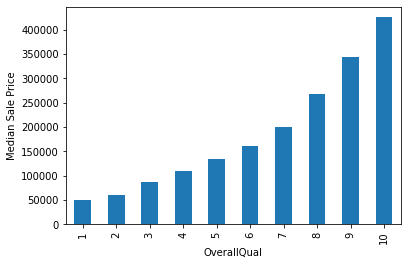

In [30]:
qual.plot(kind='bar')
plt.xlabel('OverallQual')
plt.ylabel('Median Sale Price')
plt.show()

Here we have choosen median as it is robust to outliers and the skewness. We can clearly see as the quality of the house increases, the price is also increases.

Lets see the 'GrLivArea' and visualize its trend with the dependent variable. this is a continious variable, lets try to plot a scatter plot and see how the data distribution is.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

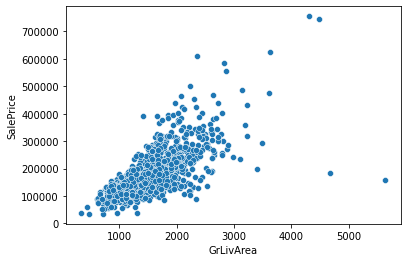

In [31]:
sns.scatterplot(x=numeric_tr['GrLivArea'], y=numeric_tr['SalePrice'])

    We can see, there is a direct correlation with the GrLivArea, most of the data points lie between the 1k to 2k also there are some outliers above 4000. we will have to treat these outliers as it will affect our model's performance.

Lets visualize 'GarageCars' and see how the correlation trend with dependent variable.

In [32]:
numeric_tr['GarageCars'].value_counts()

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

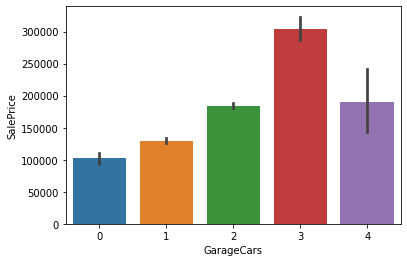

In [33]:
sns.barplot(x=numeric_tr['GarageCars'], y=numeric_tr['SalePrice'])

 This variable shows the car capacity in the Garage. We can see that 2 car capacity is most frequently brought followed by 1 and 3. 
0 and 4 are much rare. value 2 and 1 comes with average price. value 3 comes with higher price. 4 car size is brought very rare, hence the price is bit lower.

Lets look into the column 'GarageArea' and visualize the trend.

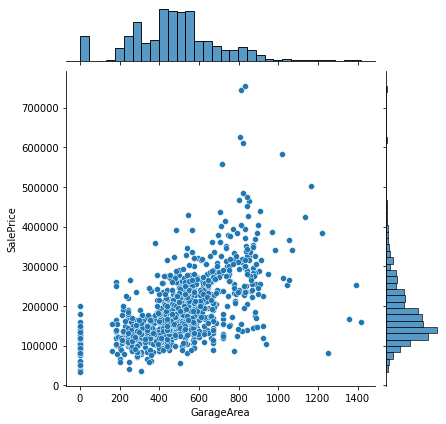

In [34]:
sns.jointplot(x=numeric_tr['GarageArea'], y=numeric_tr['SalePrice'])

We can observe that the size of Garage in square feet between 200 to 600 sq ft is sold more as it falls under average SalePrice of 100000 upto 300000. We aslo see some outliers in GarageArea above 1200 sq ft.

GarageCars and GarageArea has almost same correlation level to SalePrice. Hence we can consider only GarageCars as one of the feature.

Now lets look into the feature 'TotalBsmtSF', visualize and trend of this feature with dependent variable. This is also a continous variable. Lets plot a scatter plot for better understanding

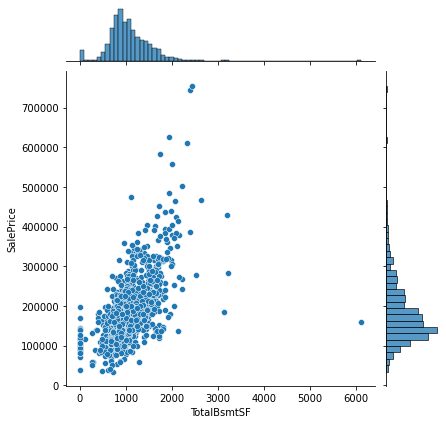

In [35]:
sns.jointplot(x=numeric_tr['TotalBsmtSF'], y=numeric_tr['SalePrice'])

TotalBsmtSF, Total sq ft of basement area. the density is higher when it is from 500 sq ft to 1500 sq ft. Here also we see 3 outliers, 1 which is greater than 6000 sq ft and other 2 has more than 700000 SalePrice.

The trend shows that as the Basement area increases the price also increased

Lets look into the feature '1stFlrSF', First Floor Sq ft. This is also a continous variable. Lets plot a jointplot to view the trend and the relation with the dependent variable SalePrice.

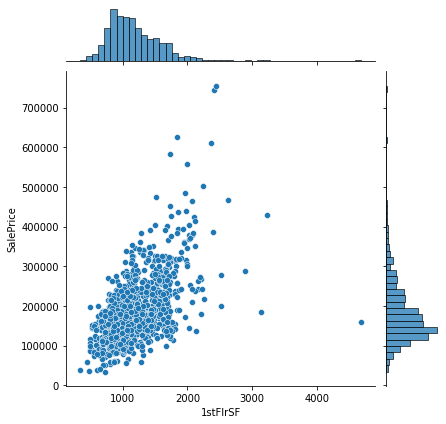

In [36]:
sns.jointplot(x=numeric_tr['1stFlrSF'], y=numeric_tr['SalePrice'])

TotalBsmtSF and 1stFlrSF trends looks similar. The density is higher at 500 sq ft to 1500 sq ft. As the area increased the SalePrice also has increase. So we can consider only one variable 'TotalBsmtSF' as they both have same correlation level. 

Lets look into the feature 'FullBath', full bathrooms above grade

In [37]:
numeric_tr['FullBath'].value_counts()

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64

The number of bathrooms above the basement has sold higher followed by 1. 3 and 0 are very rare. Lets look into the relation with SalePrice.

In [38]:
fullbath=numeric_tr['SalePrice'].groupby(numeric_tr['FullBath']).median()
fullbath

FullBath
0    153337
1    133000
2    200000
3    299800
Name: SalePrice, dtype: int64

The SalePrice of 1 and 2 Bathrooms are comparitively less when compare to 3. We have considered the median value of SalePrice as it is skewed and its robust to outliers.

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

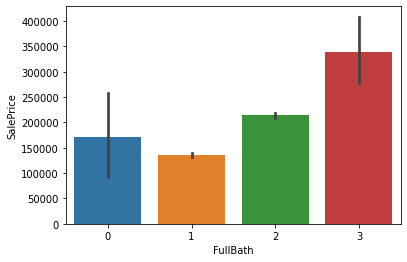

In [39]:
sns.barplot(x=numeric_tr['FullBath'], y=numeric_tr['SalePrice'])

By looking at the graph we can clearly see that if there are 3 bathrooms the cost is higher. 1 and 2 are comes with relatively lesser price.

TotRmsAbvGrd, Total Rooms above ground.

In [40]:
numeric_tr['TotRmsAbvGrd'].value_counts()

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

The total number of rooms above grade starts from 2 to 14. total no.of rooms 6 are sold higher followed by 7,5,8,4 and 9. 12,2,14 are very rarely brought. We can consider 2 and 14 as outliers in this case.

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

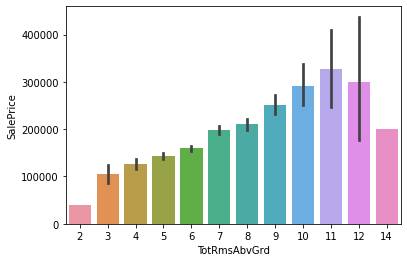

In [41]:
sns.barplot(x=numeric_tr['TotRmsAbvGrd'], y=numeric_tr['SalePrice'])

When we look for the price distribution among these, the house which has 11 rooms has higher cost. 6,7,5,8,4,9 has average price, affordable by common man, hence the sale is higher for 6,7,5,8,4.

In [42]:
rooms=numeric_tr['SalePrice'].groupby(numeric_tr['TotRmsAbvGrd']).median()
rooms

TotRmsAbvGrd
2      39300
3      92000
4     127500
5     130000
6     153337
7     187250
8     200000
9     252000
10    276000
11    303477
12    220000
14    200000
Name: SalePrice, dtype: int64

<AxesSubplot:xlabel='TotRmsAbvGrd'>

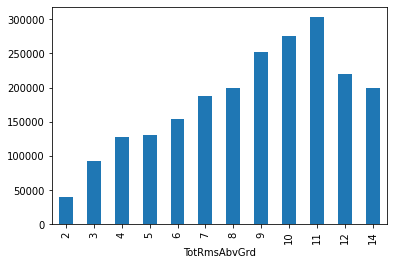

In [43]:
rooms.plot(kind='bar')

We can clearly see the median value of the saleprice for each number of rooms.

YearBuilt, is original construction date. This variable and TotRmsAbvGrd and YearRemodAdd has almost same correlation with SalePrice. Hence lets consider only the TotRmsAbvGrd feature for our analysis.

Then we have 'GarageYrBlt', year Garage was built. Lets see which year construction has higher sale.

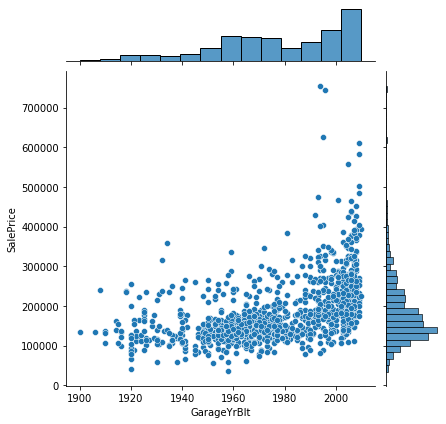

In [44]:
sns.jointplot(x=numeric_tr['GarageYrBlt'], y=numeric_tr['SalePrice'])

The Most recent year built has higher cost. Also the sale from 1960 and above is more likely to be sold sooner. There are some outliers too.

In [45]:
#Lets exclude the year features from the continuous data 
year_feat=[i for i in numeric_tr if 'Yr' in i or 'Year' in i]
year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [46]:
#Now lets extract the numerical data which has the descrete variables.

desc_numer_tr=[i for i in numeric_tr if len(data_train[i].unique())<15 and i not in year_feat]
desc_numer_tr, len(desc_numer_tr)


(['OverallQual',
  'OverallCond',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'PoolArea',
  'MoSold'],
 13)

In [47]:
data_train[desc_numer_tr].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,6,5,0,0,2,0,2,1,5,1,2,0,2
1,8,6,1,0,2,0,4,1,8,1,2,0,10
2,7,5,1,0,2,1,3,1,8,1,2,0,6
3,6,6,0,0,2,0,3,1,7,1,2,0,1
4,6,7,0,1,2,0,3,1,8,1,2,0,6


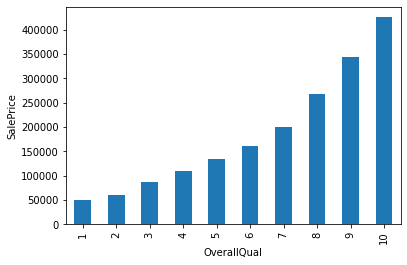

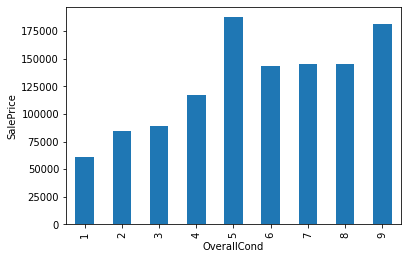

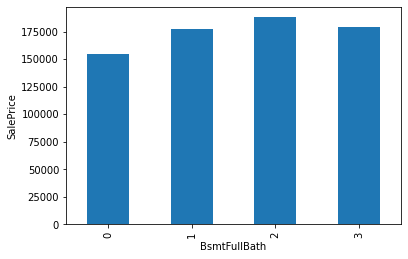

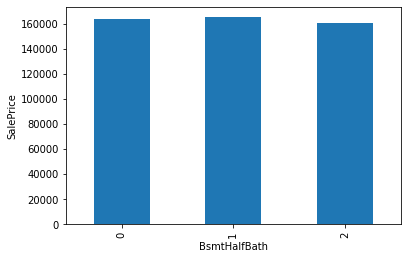

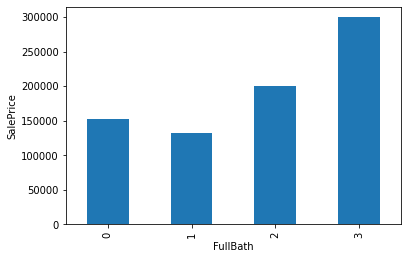

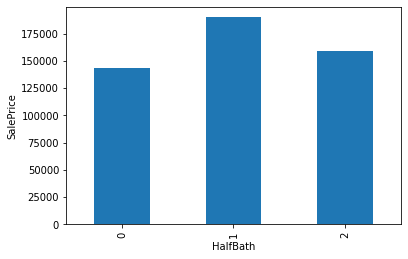

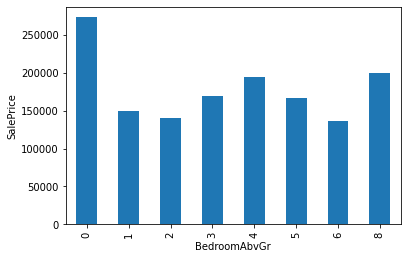

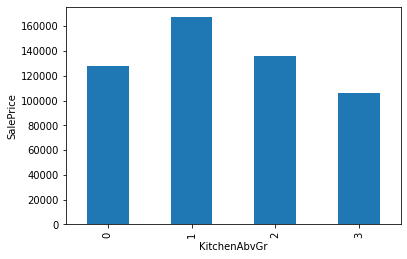

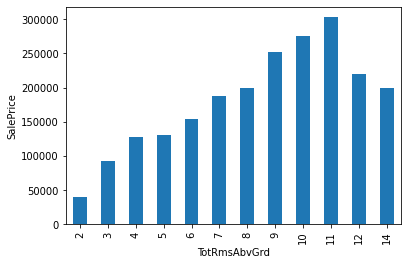

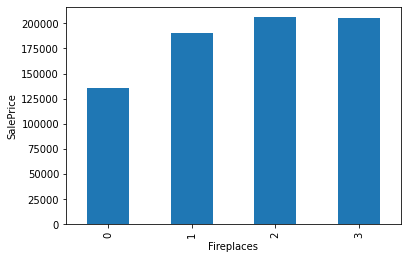

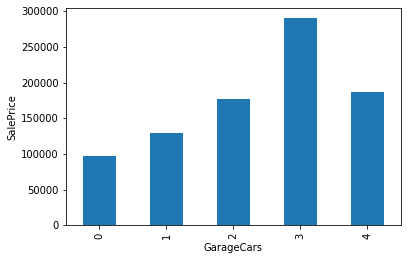

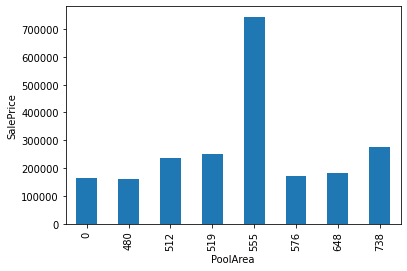

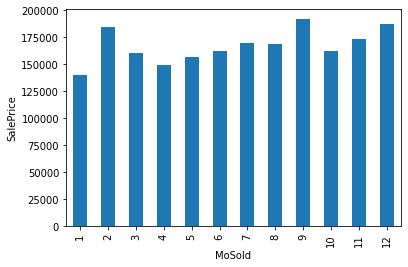

In [48]:
#Lets find the relationship between the descrete numericals and the SalePrice

for i in desc_numer_tr:
    data = data_train.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

We can observe that there is a relationship with the SalePrice.

In [49]:
#Now lets extract the numerical data which has the continuou variables.

cont_numer_tr=[i for i in numeric_tr if len(data_train[i].unique())>15 and i not in year_feat]
cont_numer_tr, len(cont_numer_tr)


(['LotFrontage',
  'LotArea',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'MiscVal',
  'SalePrice'],
 19)

Now lets see how the continuous variables are distributed.

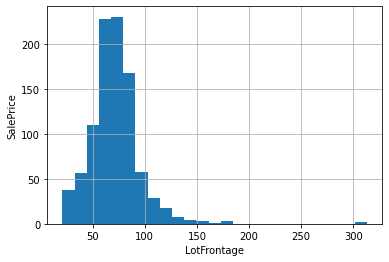

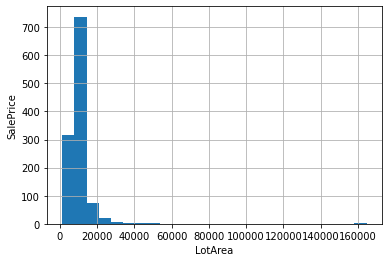

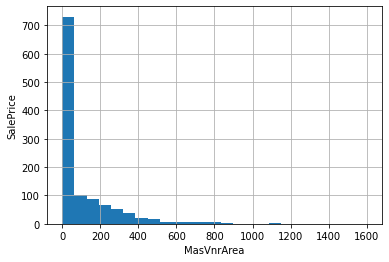

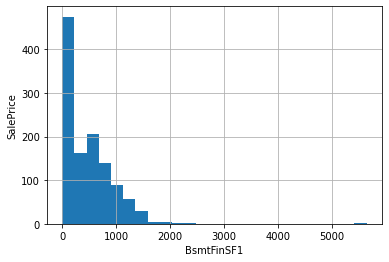

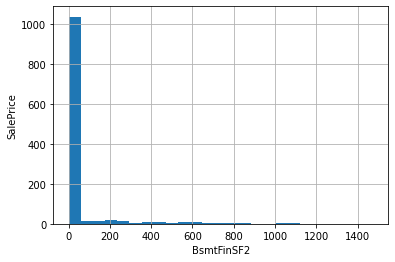

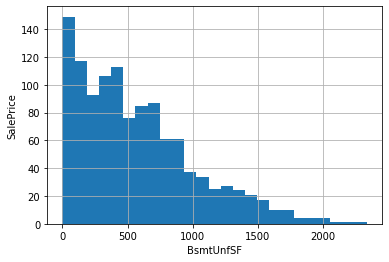

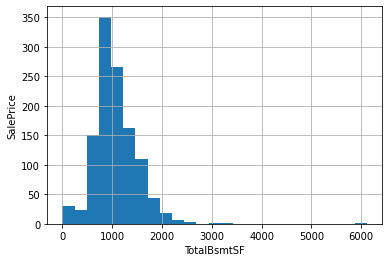

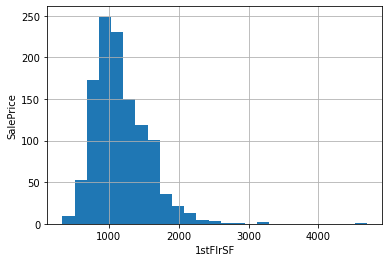

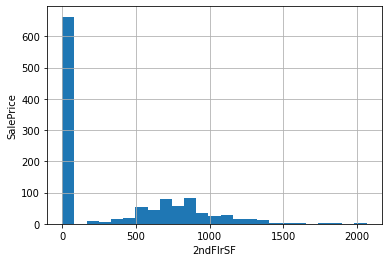

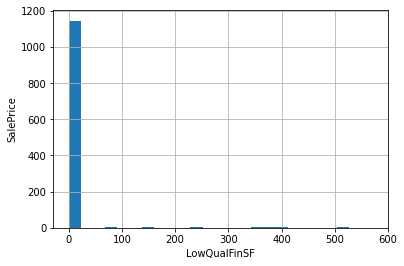

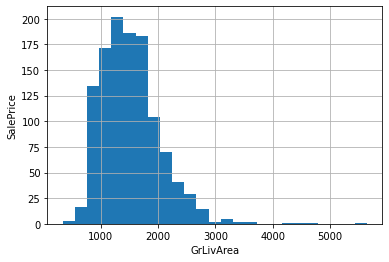

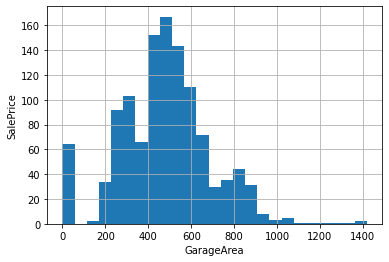

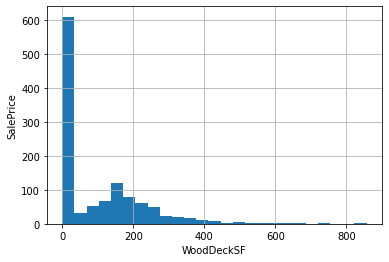

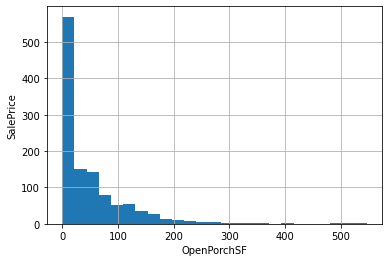

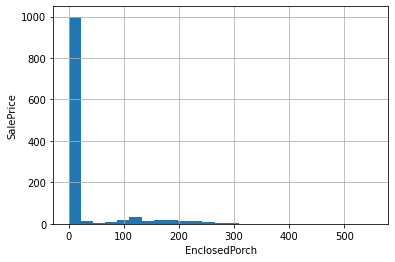

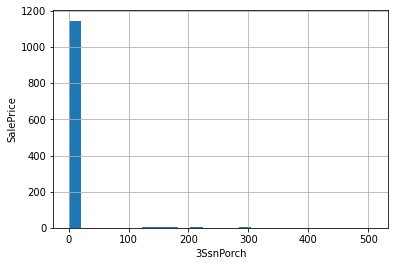

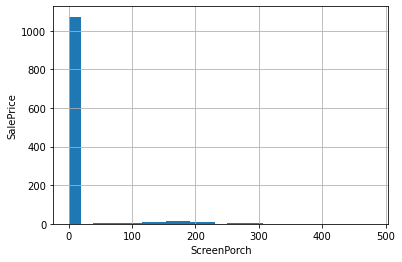

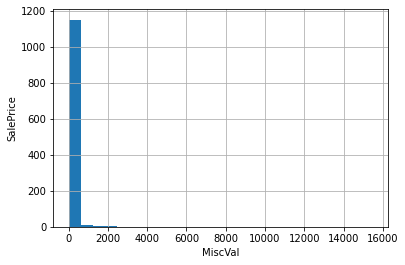

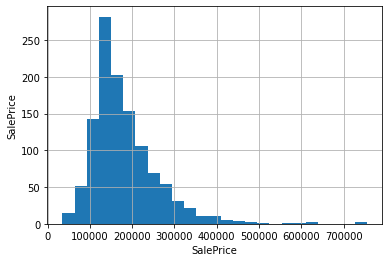

In [50]:
for i in cont_numer_tr:
    data = data_train.copy()
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

We can see that many of the features are right skewed. Lets apply log transformation 

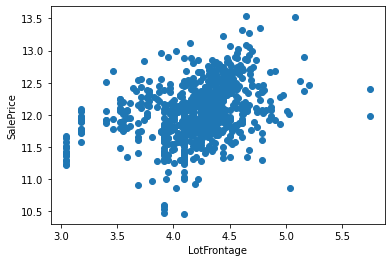

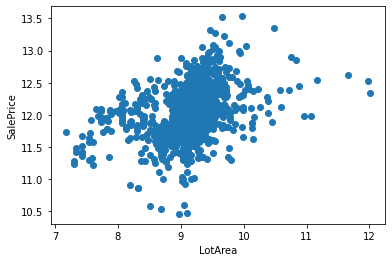

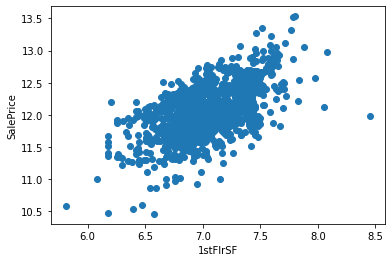

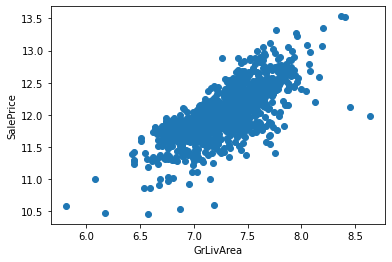

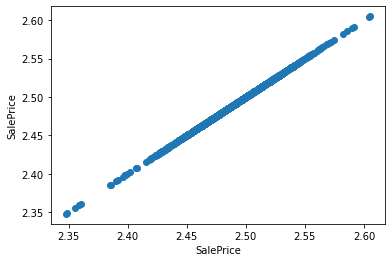

In [51]:
for i in cont_numer_tr:
    data=data_train.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[i], data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

###### Outliers in Continuous Data

Now Lets check the Outliers in the Continuous data

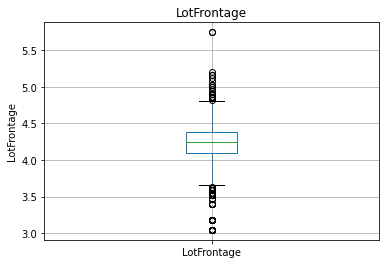

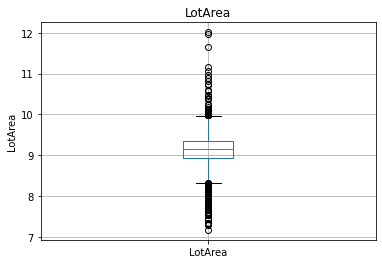

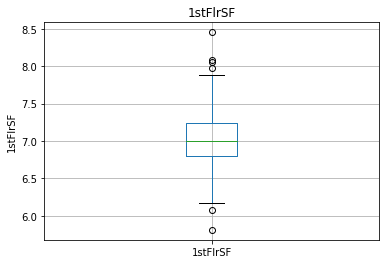

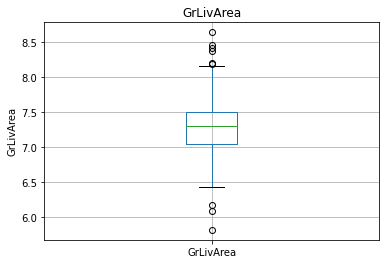

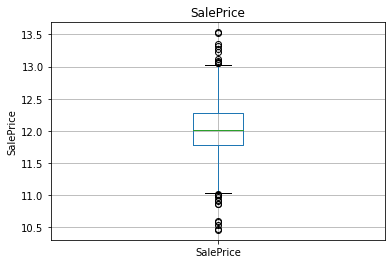

In [52]:
for i in cont_numer_tr:
    data=data_train.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

###### Categorical Variables

Now lets move on to the Categorcal features, we have already separated it.

In [53]:
categorical_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Street         1168 non-null   object
 2   Alley          77 non-null     object
 3   LotShape       1168 non-null   object
 4   LandContour    1168 non-null   object
 5   Utilities      1168 non-null   object
 6   LotConfig      1168 non-null   object
 7   LandSlope      1168 non-null   object
 8   Neighborhood   1168 non-null   object
 9   Condition1     1168 non-null   object
 10  Condition2     1168 non-null   object
 11  BldgType       1168 non-null   object
 12  HouseStyle     1168 non-null   object
 13  RoofStyle      1168 non-null   object
 14  RoofMatl       1168 non-null   object
 15  Exterior1st    1168 non-null   object
 16  Exterior2nd    1168 non-null   object
 17  MasVnrType     1161 non-null   object
 18  ExterQual      1168 non-null

In [54]:
categorical_tr.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1168,1168,77,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1161,1168,1168,1168,1138,1138,1137,1138,1137,1168,1168,1168,1168,1168,1168,617,1104,1104,1104,1104,1168,7,237,44,1168,1168
unique,5,2,2,4,4,1,5,3,25,9,8,5,8,6,8,14,15,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,928,1164,41,740,1046,1168,842,1105,182,1005,1154,981,578,915,1144,396,387,696,717,1022,516,517,1041,756,345,1002,1143,585,1090,1070,578,1085,301,691,487,1050,1061,1071,3,129,40,999,945


By describing the categorical feature, we can see the number of unique categories, Top category and the frequency at one command. We have 43 categorcal features.

MSZoning


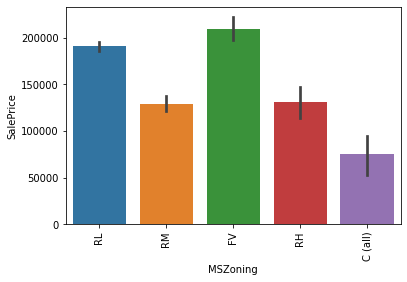

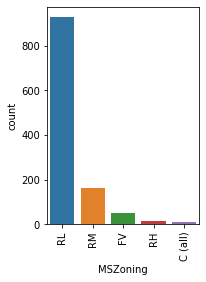

Street


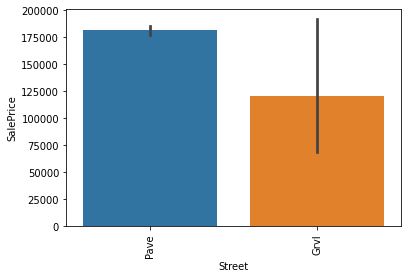

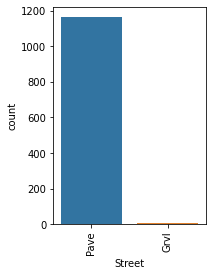

Alley


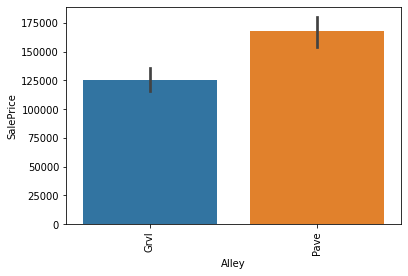

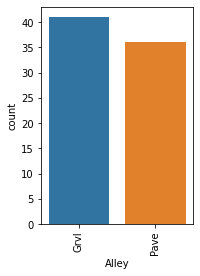

LotShape


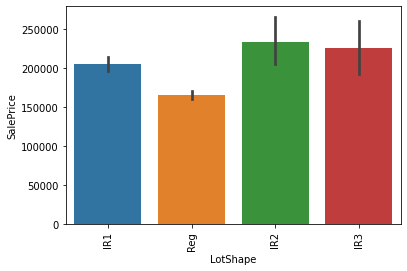

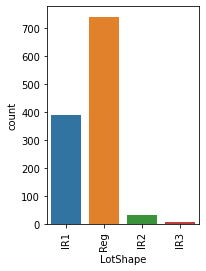

LandContour


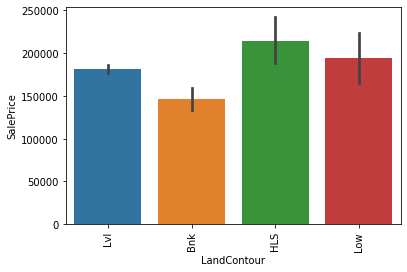

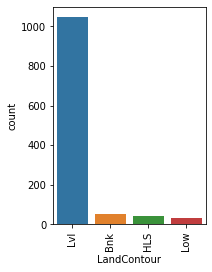

Utilities


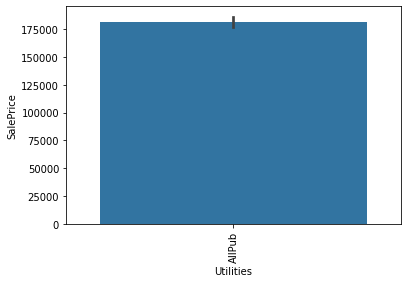

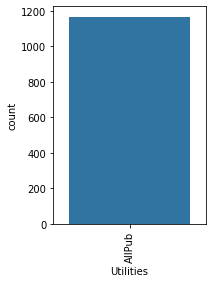

LotConfig


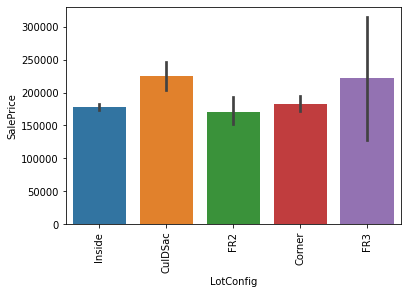

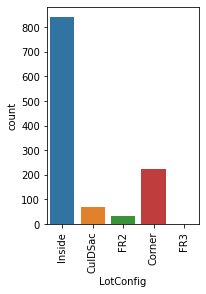

LandSlope


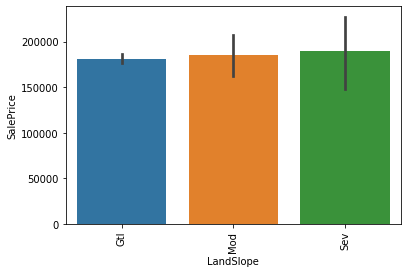

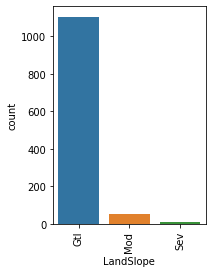

Neighborhood


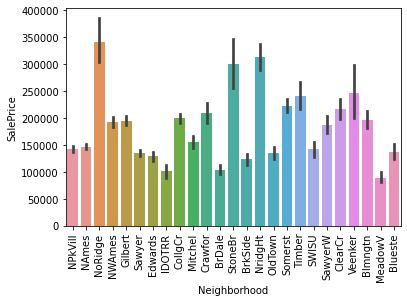

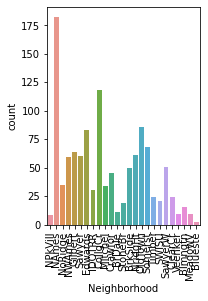

Condition1


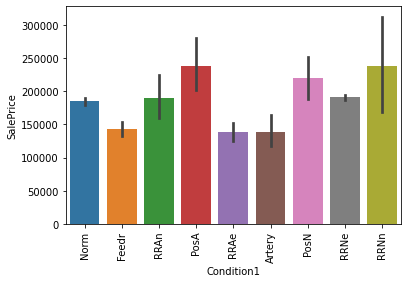

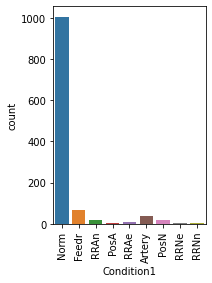

Condition2


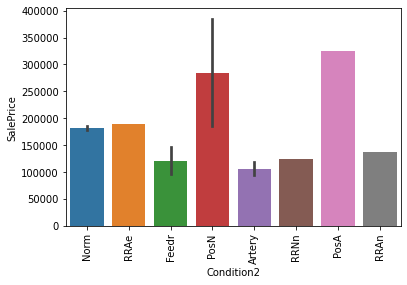

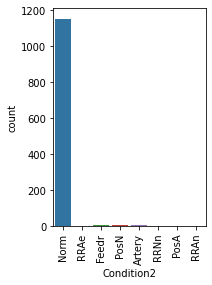

BldgType


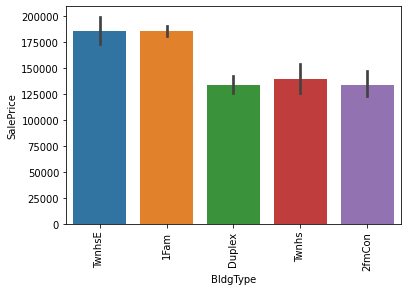

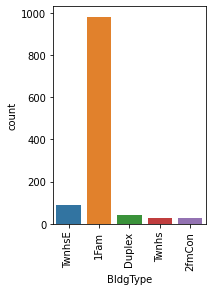

HouseStyle


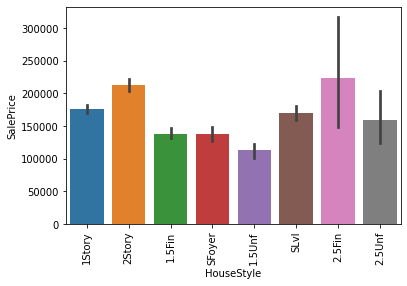

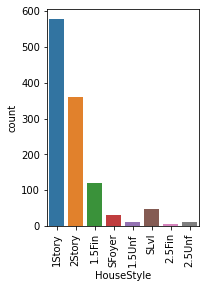

RoofStyle


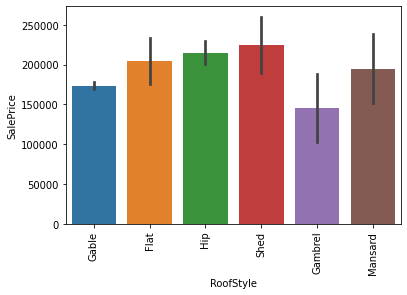

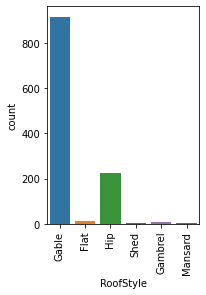

RoofMatl


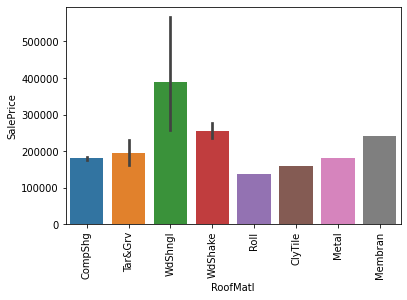

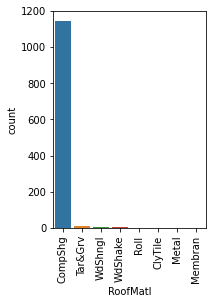

Exterior1st


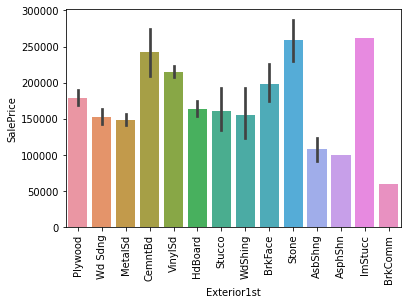

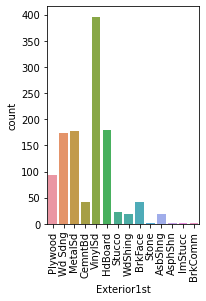

Exterior2nd


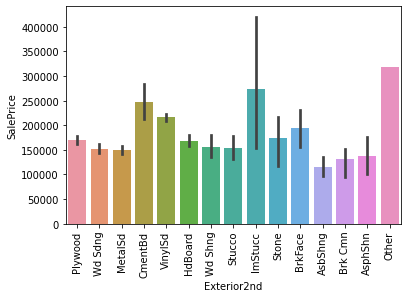

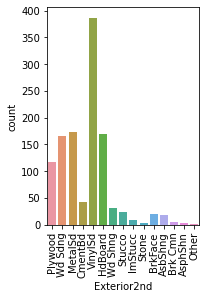

MasVnrType


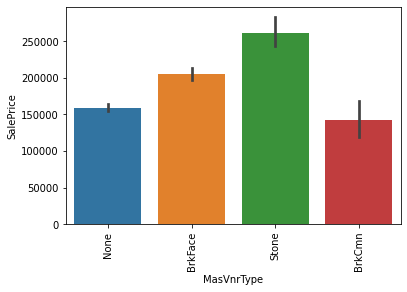

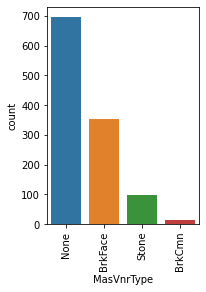

ExterQual


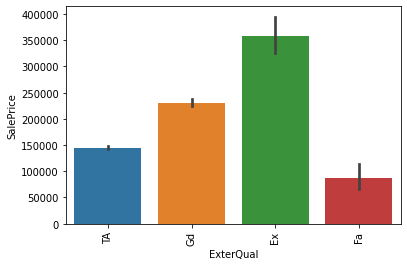

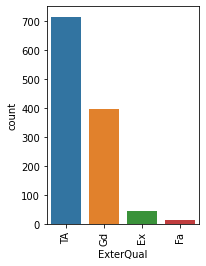

ExterCond


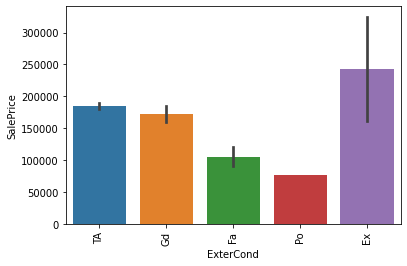

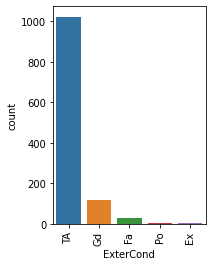

Foundation


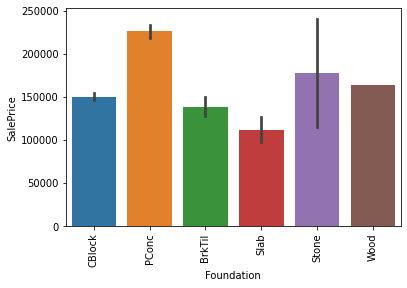

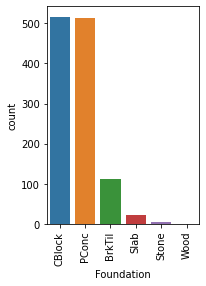

BsmtQual


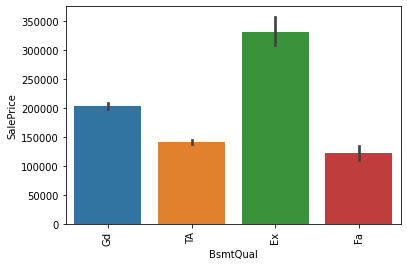

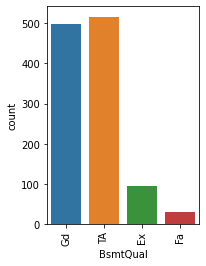

BsmtCond


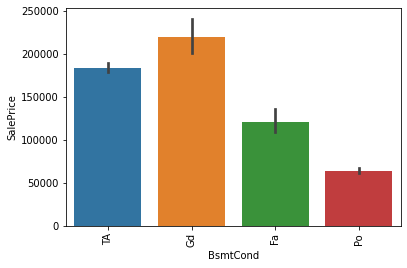

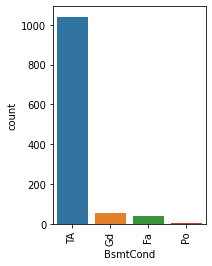

BsmtExposure


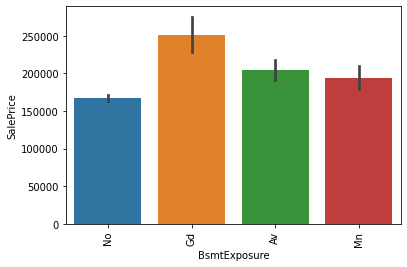

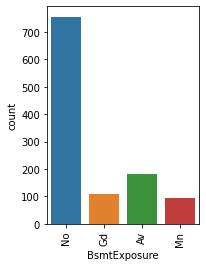

BsmtFinType1


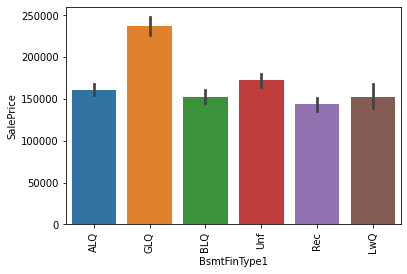

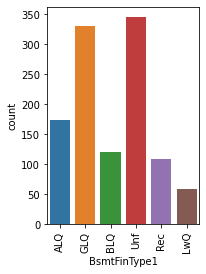

BsmtFinType2


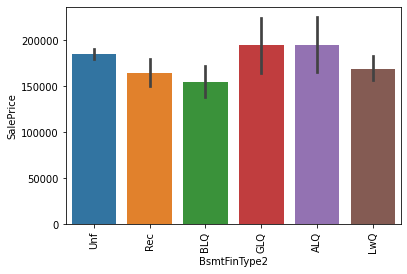

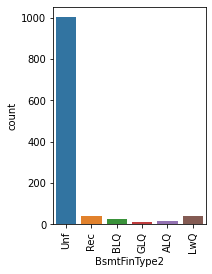

Heating


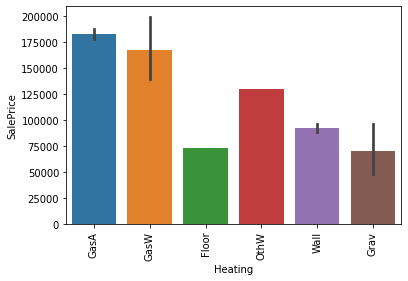

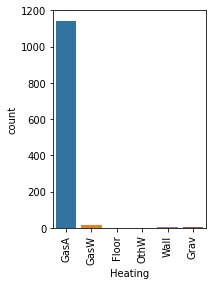

HeatingQC


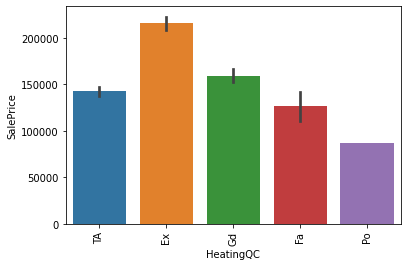

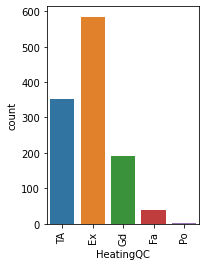

CentralAir


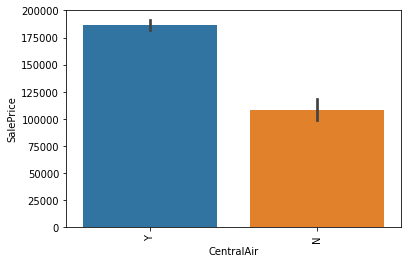

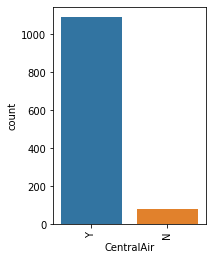

Electrical


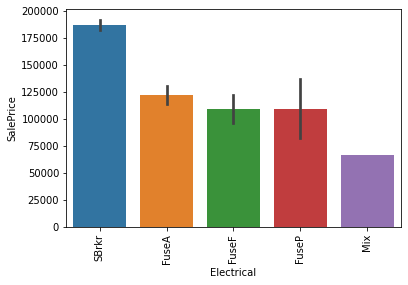

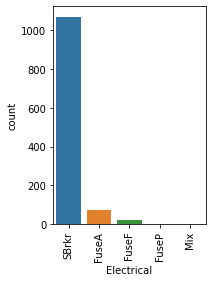

KitchenQual


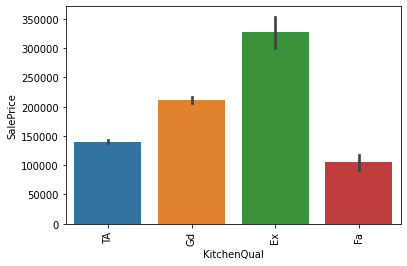

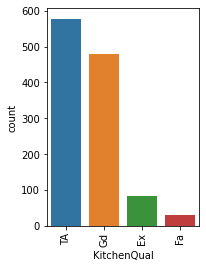

Functional


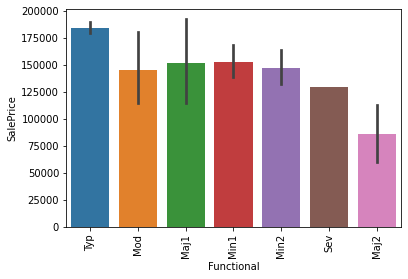

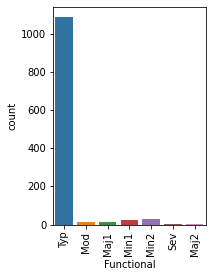

FireplaceQu


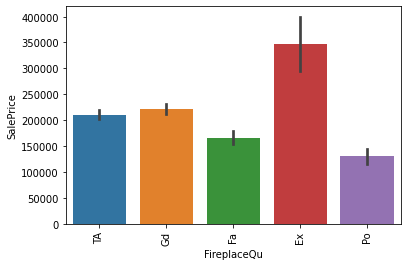

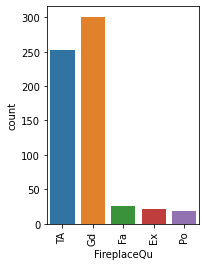

GarageType


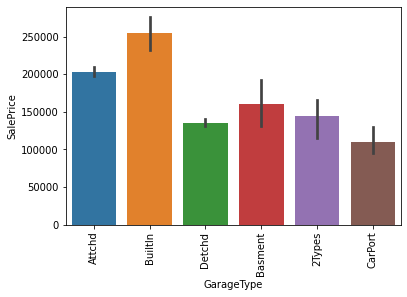

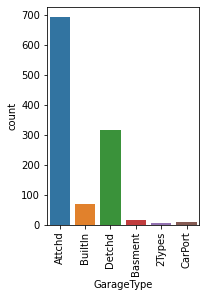

GarageFinish


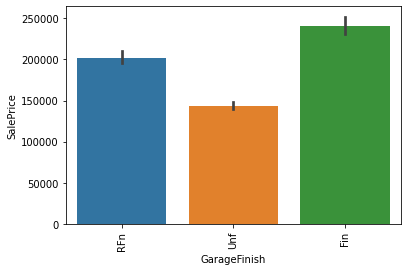

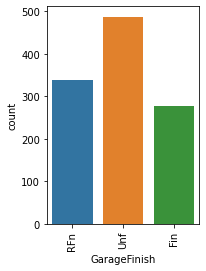

GarageQual


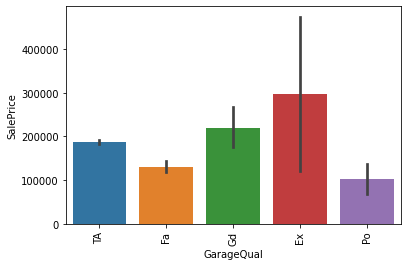

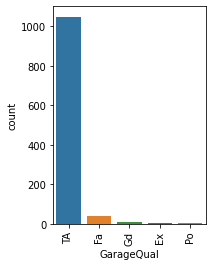

GarageCond


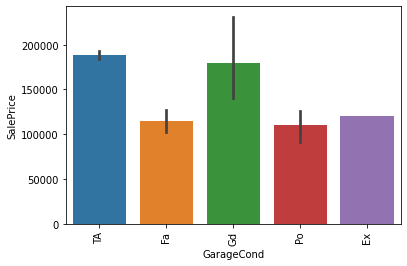

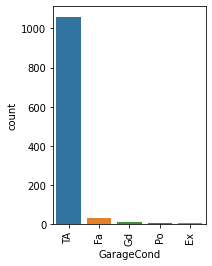

PavedDrive


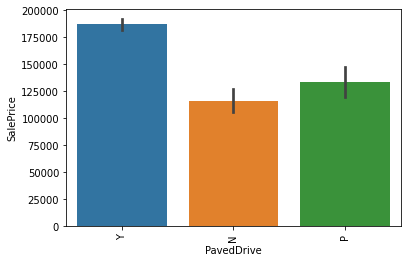

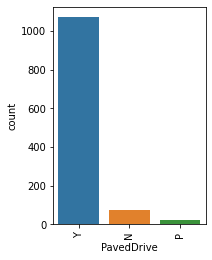

PoolQC


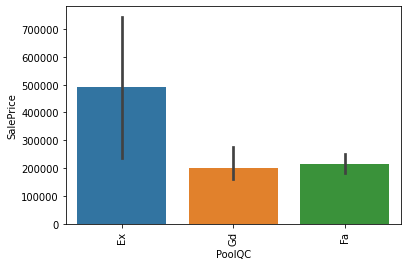

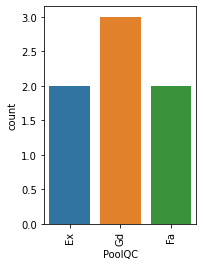

Fence


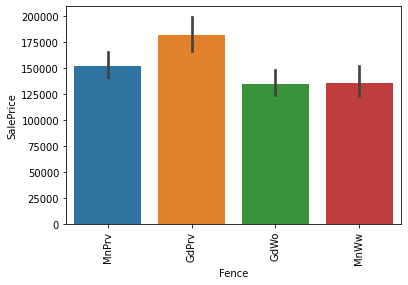

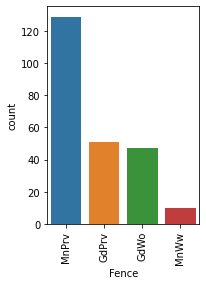

MiscFeature


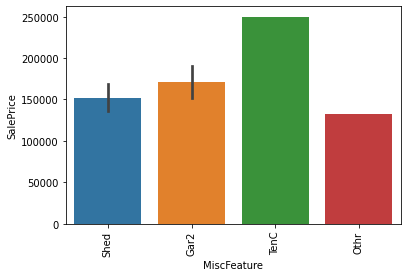

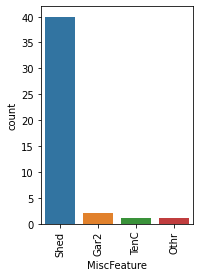

SaleType


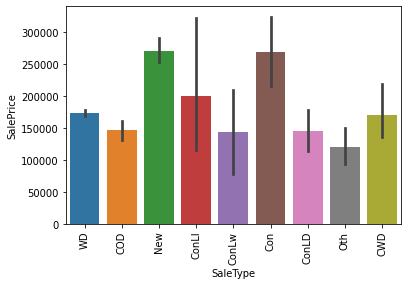

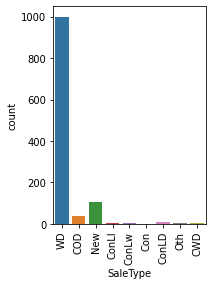

SaleCondition


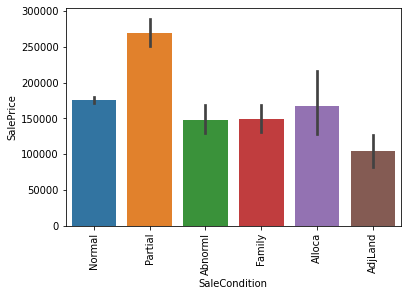

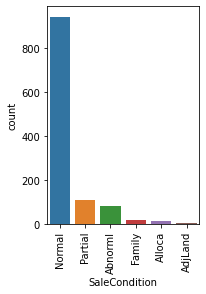

In [55]:
for col in data_train.select_dtypes(include='object').columns:
    print(col)
    sns.barplot(x=col, y="SalePrice", data=data_train)
    plt.xticks(rotation=90)
    plt.subplot(1,1,1)
    plt.show()
    
    #print(col)
    plt.subplot(1,2,2)
    sns.countplot(x=col, data=data_train)
    plt.xticks(rotation=90)
    #plt.subplot(1,2,2)
    plt.show()
    

From the above graphs we can see categorical data trend with the SalePrice and the counts of the individual categories. The graphs clearly says that wherever a categorical value count is more, the SalePrice is average as it is affordable.

###### Feature Engineering

Lets apply the feature engineering techniques seperately to train and test data to avoid the data leakage.

In [56]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


Lets first treat the missing values.

###### Missing values

In [57]:
missing=data_train.isnull().sum()*100/len(data_train) #fetching the % of missing values
missing=missing[missing>0] #only greater than 0 misisng values
missing.sort_values(ascending=False)

PoolQC          99.400685
MiscFeature     96.232877
Alley           93.407534
Fence           79.708904
FireplaceQu     47.174658
LotFrontage     18.321918
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
BsmtExposure     2.654110
BsmtFinType2     2.654110
BsmtCond         2.568493
BsmtFinType1     2.568493
BsmtQual         2.568493
MasVnrArea       0.599315
MasVnrType       0.599315
dtype: float64

Lets not consider PoolQC, MiscFeature, Alley and Fence as they have more that 80% of missing values. But lets replace all the missing values in these 4 variables as 'missing' to identify the missing values

In [58]:
data_train['PoolQC'].fillna('missing', inplace=True)
data_train['MiscFeature'].fillna('missing', inplace=True)
data_train['Alley'].fillna('missing', inplace=True)
data_train['Fence'].fillna('missing', inplace=True)

Now lets move on to fill the other missing values with appropriate values

In [59]:
#FireplaceQu
data_train['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [60]:
data_train['FireplaceQu'].head(10)

0     TA
1     TA
2     TA
3     TA
4     TA
5     Gd
6     Gd
7     TA
8    NaN
9    NaN
Name: FireplaceQu, dtype: object

Lets fill the missing values for FireplaceQu as per the Fireplaces details. Lets crosstab Fireplaces and FireplaceQu to check. Also filling the Nan values as Missing to identify the missing values.

In [61]:
data_train['FireplaceQu'].fillna('missing', inplace=True)

In [62]:
FireQu=pd.crosstab(data_train['FireplaceQu'], data_train['Fireplaces'], margins=True)
FireQu

Fireplaces,0,1,2,3,All
FireplaceQu,,,,,
Ex,0,16,4,1,21
Fa,0,22,2,1,25
Gd,0,256,43,2,301
Po,0,18,0,0,18
TA,0,206,45,1,252
missing,551,0,0,0,551
All,551,518,94,5,1168


We can clearly see that the corresponding Fireplaces(no.of fireplaces) for the Missing FireplaceQu is 0. Hence we can fill the missing values as NA, that is No fireplace.

In [63]:
data_train['FireplaceQu'].replace('missing', 'NA', inplace=True)

In [64]:
data_train['FireplaceQu'].value_counts()

NA    551
Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [65]:
#LotFrontage - 

#this is a continous variable. As we have seen earlier, the datapoints are skewed. 
#So lets fill the missing values by the median of the LotFrontage.

In [66]:
data_train['LotFrontage'].mode()

0    60.0
dtype: float64

In [67]:
data_train['LotFrontage'].median()

70.0

In [68]:
data_train['LotFrontage'].fillna(data_train['LotFrontage'].median(), inplace=True)

In [69]:
#Garage related missing values

In [70]:
data_train['GarageType'].fillna('missing', inplace=True)
data_train['GarageFinish'].fillna('missing', inplace=True)
data_train['GarageYrBlt'].fillna('missing', inplace=True)
data_train['GarageQual'].fillna('missing', inplace=True)
data_train['GarageCond'].fillna('missing', inplace=True)

In [71]:
garage=pd.crosstab([data_train['GarageType'], data_train['GarageFinish']], data_train['GarageCars'], margins=True )

In [72]:
garage

GarageCars                0    1    2    3  4   All
GarageType GarageFinish                            
2Types     Fin            0    0    0    0  1     1
           RFn            0    0    1    0  0     1
           Unf            0    0    0    3  0     3
Attchd     Fin            0   14  144   56  1   215
           RFn            0   42  207   48  0   297
           Unf            0   74   97    8  0   179
Basment    Fin            0    0    2    0  0     2
           RFn            0    3    2    0  0     5
           Unf            0    5    4    0  0     9
BuiltIn    Fin            0    0   29   19  0    48
           RFn            0    2   12    5  0    19
           Unf            0    3    0    0  0     3
CarPort    Unf            0    3    5    0  0     8
Detchd     Fin            0    3    9    0  0    12
           RFn            0    2   14    1  0    17
           Unf            0  137  139    7  2   285
missing    missing       64    0    0    0  0    64
All                      64  288  665  147  4  1168

from the above cross tab table its clear that who has 0 cars, other Garage data's are missing. Hence we can fill them as NA, No Garage

In [73]:
#Lets fill all these Missing values of Garage as NA.

In [74]:
data_train['GarageType'].replace('missing', 'NA', inplace=True)
data_train['GarageFinish'].replace('missing', 'NA', inplace=True)
data_train['GarageQual'].replace('missing', 'NA', inplace=True)
data_train['GarageCond'].replace('missing', 'NA', inplace=True)

In [75]:
#replacing the missing values with 0 as there is no garage and hence no GarageYrBlt.
data_train['GarageYrBlt'].replace('missing', 0, inplace=True)

In [76]:
#Bsmt related missing values

In [77]:
data_train['BsmtExposure'].fillna('missing', inplace=True)
data_train['BsmtFinType2'].fillna('missing', inplace=True)
data_train['BsmtCond'].fillna('missing', inplace=True)
data_train['BsmtFinType1'].fillna('missing', inplace=True)
data_train['BsmtQual'].fillna('missing', inplace=True)

In [78]:
bsmtq=pd.crosstab(data_train['BsmtQual'], data_train['BsmtFinType2'], margins=True)
bsmtq

BsmtFinType2,ALQ,BLQ,GLQ,LwQ,Rec,Unf,missing,All
BsmtQual,,,,,,,,
Ex,1,0,2,0,0,91,0,94
Fa,0,0,0,1,0,28,0,29
Gd,5,7,7,17,8,453,1,498
TA,10,17,3,22,35,430,0,517
missing,0,0,0,0,0,0,30,30
All,16,24,12,40,43,1002,31,1168


In [79]:
Bsmt=pd.crosstab([data_train['BsmtExposure'], data_train['BsmtFinType2']], data_train['TotalBsmtSF'], margins=True )
Bsmt

TotalBsmtSF                 0  105  264  270  290  319  360  372  384  408  \
BsmtExposure BsmtFinType2                                                    
Av           ALQ            0    0    0    0    0    0    0    0    0    0   
             BLQ            0    0    0    0    0    0    0    0    0    0   
             GLQ            0    0    0    0    0    0    0    0    0    0   
             LwQ            0    0    0    0    0    0    0    0    0    0   
             Rec            0    0    0    0    0    0    0    0    0    0   
             Unf            0    1    0    0    0    0    0    1    0    0   
Gd           ALQ            0    0    0    0    0    0    0    0    0    0   
             BLQ            0    0    0    0    0    0    0    0    0    0   
             GLQ            0    0    0    0    0    0    0    0    0    0   
             LwQ            0    0    0    0    0    0    0    0    0    0   
             Rec            0    0    0    0    0    0    0    0    0    0   
             Unf            0    0    0    0    0    0    0    0    0    0   
Mn           ALQ            0    0    0    0    0    0    0    0    0    0   
             BLQ            0    0    0    0    0    0    0    0    0    0   
             GLQ            0    0    0    0    0    0    0    0    0    0   
             LwQ            0    0    0    0    0    0    0    0    0    0   
             Rec            0    0    0    0    0    0    0    0    0    0   
             Unf            0    0    0    0    0    0    0    0    0    0   
No           ALQ            0    0    0    0    0    0    0    0    0    0   
             BLQ            0    0    0    0    0    0    0    0    0    0   
             GLQ            0    0    0    0    0    0    0    0    0    0   
             LwQ            0    0    0    0    0    0    0    0    0    0   
             Rec            0    0    0    0    0    0    0    0    0    0   
             Unf            0    0    2    1    1    1    1    0    3    1   
             missing        0    0    0    0    0    0    0    0    0    0   
missing      Unf            0    0    0    0    0    0    0    0    0    0   
             missing       30    0    0    0    0    0    0    0    0    0   
All                        30    1    2    1    1    1    1    1    3    1   

TotalBsmtSF                420  440  458  480  482  483  485  504  506  520  \
BsmtExposure BsmtFinType2                                                     
Av           ALQ             0    0    0    0    0    0    0    0    0    0   
             BLQ             0    0    0    0    0    0    0    0    0    0   
             GLQ             0    0    0    0    0    0    0    0    0    0   
             LwQ             0    0    0    0    0    0    0    0    0    0   
             Rec             0    0    0    0    0    0    0    0    0    0   
             Unf             0    0    0    1    0    0    0    0    1    2   
Gd           ALQ             0    0    0    0    0    0    0    0    0    0   
             BLQ             0    0    0    0    0    0    0    0    0    0   
             GLQ             0    0    0    0    0    0    0    0    0    0   
             LwQ             0    0    0    0    0    0    0    0    0    0   
             Rec             0    0    0    0    0    0    0    0    0    0   
             Unf             0    0    0    0    0    0    0    0    0    0   
Mn           ALQ             0    0    0    0    0    0    0    0    0    0   
             BLQ             0    0    0    0    0    0    0    0    0    0   
             GLQ             0    0    0    0    0    0    0    0    0    0   
             LwQ             0    0    0    0    0    0    0    0    0    0   
             Rec             0    0    0    0    0    0    0    0    0    0   
             Unf             0    0    0    0    0    0    0    0    0    0   
No           ALQ             0    0    0    0    0    0    0    0    0    0   


By looking at the above 2 tables, Its clear that 30 missing values are nothing but NA, that is No Basement. Lets find out the 1 which is left.

In [80]:
data_train['BsmtExposure'].value_counts()

No         756
Av         180
Gd         108
Mn          93
missing     31
Name: BsmtExposure, dtype: int64

In [81]:
bsmtf=pd.crosstab(data_train['BsmtQual'], data_train['BsmtFinType2']=='missing', margins=True)
bsmtf

BsmtFinType2,False,True,All
BsmtQual,,,
Ex,94,0,94
Fa,29,0,29
Gd,497,1,498
TA,517,0,517
missing,0,30,30
All,1137,31,1168


In [82]:
bsmte=pd.crosstab(data_train['BsmtQual'], data_train['BsmtExposure']=='missing', margins=True)
bsmte

BsmtExposure,False,True,All
BsmtQual,,,
Ex,94,0,94
Fa,29,0,29
Gd,497,1,498
TA,517,0,517
missing,0,30,30
All,1137,31,1168


In [83]:
pd.crosstab(data_train['BsmtQual'], data_train['BsmtExposure'], margins=True)

BsmtExposure,Av,Gd,Mn,No,missing,All
BsmtQual,,,,,,
Ex,27,25,7,35,0,94
Fa,0,1,4,24,0,29
Gd,108,55,46,288,1,498
TA,45,27,36,409,0,517
missing,0,0,0,0,30,30
All,180,108,93,756,31,1168


From the above table we can see a Gd quality is missing in BsmtExposure and BsmtFinType2. So lets fill this by the mode value and other 30 missing values by NA, No Basement

In [84]:
data_train['BsmtCond'].replace('missing', 'NA', inplace=True)
data_train['BsmtFinType1'].replace('missing', 'NA', inplace=True)
data_train['BsmtQual'].replace('missing', 'NA', inplace=True)

In [85]:
#30 missing values by NA and 1 missing value by mode value
data_train['BsmtExposure']=np.where(data_train['BsmtQual']=='NA', 'NA', data_train['BsmtExposure']) 

In [86]:
data_train['BsmtExposure'].replace('missing', 'No', inplace=True)

In [87]:
pd.crosstab(data_train['BsmtQual'], data_train['BsmtExposure'], margins=True)

BsmtExposure,Av,Gd,Mn,NA,No,All
BsmtQual,,,,,,
Ex,27,25,7,0,35,94
Fa,0,1,4,0,24,29
Gd,108,55,46,0,289,498
NA,0,0,0,30,0,30
TA,45,27,36,0,409,517
All,180,108,93,30,757,1168


In [88]:
#30 missing values by NA and 1 missing value by mode value
data_train['BsmtExposure']=np.where(data_train['BsmtQual']=='NA', 'NA', data_train['BsmtExposure']) 
data_train['BsmtExposure'].replace('missing', 'No', inplace=True)

In [89]:
data_train['BsmtExposure'].mode()

0    No
dtype: object

In [90]:
pd.crosstab(data_train['BsmtQual'], data_train['BsmtFinType2'], margins=True)     

BsmtFinType2,ALQ,BLQ,GLQ,LwQ,Rec,Unf,missing,All
BsmtQual,,,,,,,,
Ex,1,0,2,0,0,91,0,94
Fa,0,0,0,1,0,28,0,29
Gd,5,7,7,17,8,453,1,498
NA,0,0,0,0,0,0,30,30
TA,10,17,3,22,35,430,0,517
All,16,24,12,40,43,1002,31,1168


In [91]:
#30 missing values by NA and 1 missing value by mode value
data_train['BsmtFinType2']=np.where(data_train['BsmtQual']=='NA', 'NA', data_train['BsmtFinType2'])
data_train['BsmtFinType2'].replace('missing', 'No', inplace=True)

In [92]:
pd.crosstab(data_train['BsmtQual'], data_train['BsmtFinType2'], margins=True)     

BsmtFinType2,ALQ,BLQ,GLQ,LwQ,NA,No,Rec,Unf,All
BsmtQual,,,,,,,,,
Ex,1,0,2,0,0,0,0,91,94
Fa,0,0,0,1,0,0,0,28,29
Gd,5,7,7,17,0,1,8,453,498
NA,0,0,0,0,30,0,0,0,30
TA,10,17,3,22,0,0,35,430,517
All,16,24,12,40,30,1,43,1002,1168


In [93]:
#MasVnrArea and MasVnrType

#Now we are left with only 2 missing variables, MasVnrArea and MasVnrType

In [94]:
data_train['MasVnrArea'].isnull().sum()

7

In [95]:
data_train['MasVnrType'].isnull().sum()

7

In [96]:
data_train['MasVnrArea'].mode()

0    0.0
dtype: float64

In [97]:
data_train['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [98]:
#Lets fill these 7 missing values by None and 0.0 in the variables MasVnrType and MasVnrArea

data_train['MasVnrType'].fillna('None', inplace=True)

In [99]:
data_train['MasVnrArea'].mode()

0    0.0
dtype: float64

In [100]:
data_train['MasVnrArea'].fillna(0.0, inplace=True)

In [101]:
data_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [102]:
data_test.drop(['SalePrice'], axis=1, inplace=True)

In [103]:
#Lets check the test data set for the missing values
data_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [104]:
#there is a new missing value in Electrical varable.
data_test['Electrical'].value_counts()

SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64

In [105]:
data_test['Electrical'].mode()

0    SBrkr
dtype: object

In [106]:
#Lets fill the missing value by the mode of Electrical variable
data_test['Electrical'].fillna('SBrkr', inplace=True)

In [107]:
data_test['Electrical'].isnull().sum()

0

In [108]:
#Lets fill the other Missing values as per the training dataset.



data_test['PoolQC'].fillna('missing', inplace=True)
data_test['MiscFeature'].fillna('missing', inplace=True)
data_test['Alley'].fillna('missing', inplace=True)
data_test['Fence'].fillna('missing', inplace=True)

data_test['FireplaceQu'].fillna('NA', inplace=True)
data_test['LotFrontage'].fillna(data_test['LotFrontage'].median(), inplace=True)

data_test['GarageType'].fillna('NA', inplace=True)
data_test['GarageFinish'].fillna('NA', inplace=True)
data_test['GarageQual'].fillna('NA', inplace=True)
data_test['GarageCond'].fillna('NA', inplace=True)

#replacing the missing values with 0 as there is no garage and hence no GarageYrBlt.
data_test['GarageYrBlt'].fillna(0.0, inplace=True)


data_test['BsmtCond'].fillna('NA', inplace=True)
data_test['BsmtFinType1'].fillna('NA', inplace=True)
data_test['BsmtQual'].fillna('NA', inplace=True)

#30 missing values by NA and 1 missing value by mode value
data_test['BsmtExposure']=np.where(data_test['BsmtQual']=='NA', 'NA', data_test['BsmtExposure']) 
data_test['BsmtExposure'].fillna('No', inplace=True)

#30 missing values by NA and 1 missing value by mode value
data_test['BsmtFinType2']=np.where(data_test['BsmtQual']=='NA', 'NA', data_test['BsmtFinType2'])
data_test['BsmtFinType2'].fillna('No', inplace=True)

#Lets fill these 7 missing values by None and 0.0 in the variables MasVnrType and MasVnrArea

data_test['MasVnrType'].fillna('None', inplace=True)
data_test['MasVnrArea'].fillna(0.0, inplace=True)

In [109]:
data_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

###### Numerical Variable Skewness Transformation Using Logarithmic Transformaton

We have got the numerical variables in the data analysis, Lets use log transformation to normalise the skewness

In [110]:
numerical_train=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for num in numerical_train:
    data_train[num]=np.log(data_train[num])

In [111]:
#Test Data

numerical_test=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for num in numerical_test:
    data_test[num]=np.log(data_test[num])

In [112]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,4.248495,8.502689,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,6.864848,0,0,6.864848,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,missing,missing,missing,0,2,2007,WD,Normal,11.759786
1,889,20,RL,4.553877,9.671871,Pave,missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,7.703910,0,0,7.703910,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,missing,missing,missing,0,10,2007,WD,Normal,12.498742
2,793,60,RL,4.521789,9.202308,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,7.027315,886,0,7.607381,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,missing,missing,missing,0,6,2007,WD,Normal,12.505399
3,110,20,RL,4.653960,9.371694,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,7.519692,0,0,7.519692,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,missing,MnPrv,missing,0,1,2010,COD,Normal,12.154779
4,422,20,RL,4.248495,9.719264,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,7.379008,0,0,7.379008,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,missing,missing,missing,0,6,2009,WD,Normal,12.278393


In [113]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,4.454347,9.557964,Pave,missing,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,7.561122,0,0,7.561122,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,missing,missing,missing,0,7,2007,WD,Normal
1,1018,120,RL,4.174387,8.668024,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,7.215240,0,0,7.215240,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,missing,missing,missing,0,8,2009,COD,Abnorml
2,929,20,RL,4.174387,9.379070,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,7.488853,0,0,7.488853,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,missing,missing,missing,0,6,2009,WD,Normal
3,1148,70,RL,4.317488,9.392662,Pave,missing,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,6.756932,704,0,7.355002,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,missing,missing,missing,0,7,2009,WD,Normal
4,1227,60,RL,4.454347,9.588640,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,6.795706,1039,0,7.566828,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,missing,missing,missing,0,1,2008,WD,Normal


###### Categorical Variables - Label Encoding

Lets use ordinal encoding to convert the object type categorical variables to numerical values.

In [114]:
categorical_train=[cat for cat in data_train.columns if data_train[cat].dtype=='O']
len(categorical_train)

43

In [115]:
#Test data
categorical_test=[cat for cat in data_test.columns if data_test[cat].dtype=='O']
len(categorical_test)

43

In [116]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

for cat in categorical_train:
    data_train[cat]=LE.fit_transform(data_train[cat])

In [117]:
#Test Data
for cat in categorical_test:
    data_test[cat]=LE.fit_transform(data_test[cat])

In [118]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,4.248495,8.502689,1,2,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,4,4,0,120,7,0,958,1078,1,4,1,4,6.864848,0,0,6.864848,0,0,2,0,2,1,3,5,6,1,5,1,1977.0,2,2,440,5,5,2,0,205,0,0,0,0,3,4,4,0,2,2007,8,4,11.759786
1,889,20,3,4.553877,9.671871,1,2,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,4,1,1,0,351,6,823,1043,2217,1,0,1,4,7.703910,0,0,7.703910,1,0,2,0,4,1,2,8,6,1,5,1,1970.0,3,2,621,5,5,2,81,207,0,0,224,0,3,4,4,0,10,2007,8,4,12.498742
2,793,60,3,4.521789,9.202308,1,2,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,4,0,2,862,7,0,255,1117,1,0,1,4,7.027315,886,0,7.607381,1,0,2,1,3,1,3,8,6,1,5,1,1997.0,3,2,455,5,5,2,180,130,0,0,0,0,3,4,4,0,6,2007,8,4,12.505399
3,110,20,3,4.653960,9.371694,1,2,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,4,4,1,705,7,0,1139,1844,1,0,1,4,7.519692,0,0,7.519692,0,0,2,0,3,1,3,7,6,1,5,1,1977.0,2,2,546,5,5,2,0,122,0,0,0,0,3,2,4,0,1,2010,0,4,12.154779
4,422,20,3,4.248495,9.719264,1,2,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,4,4,0,1246,7,0,356,1602,1,2,1,4,7.379008,0,0,7.379008,0,1,2,0,3,1,2,8,6,1,5,1,1977.0,0,2,529,5,5,2,240,0,0,0,0,0,3,4,4,0,6,2009,8,4,12.278393


In [119]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,4.454347,9.557964,1,2,0,1,0,0,0,21,2,0,0,2,9,5,2005,2006,3,0,9,11,3,200.0,2,3,2,0,3,1,2,1249,6,0,673,1922,0,0,1,3,7.561122,0,0,7.561122,1,0,2,0,3,1,2,8,5,1,2,1,2005.0,0,3,676,5,5,2,178,51,0,0,0,0,0,4,2,0,7,2007,5,2
1,1018,120,2,4.174387,8.668024,1,2,0,3,0,1,0,21,2,0,4,2,8,5,1984,1984,1,0,5,5,2,0.0,2,3,1,2,3,0,2,1036,6,0,184,1220,0,2,1,3,7.215240,0,0,7.215240,1,0,1,0,1,1,2,4,5,1,0,1,1984.0,2,2,565,5,5,2,63,0,0,0,0,0,0,4,2,0,8,2009,0,0
2,929,20,2,4.174387,9.379070,1,2,3,3,0,4,0,4,2,0,0,2,8,5,2001,2001,3,0,9,11,2,0.0,2,3,2,2,3,0,6,0,6,0,1753,1753,0,0,1,3,7.488853,0,0,7.488853,0,0,2,0,3,1,0,7,5,1,5,1,2001.0,2,2,522,5,5,2,202,151,0,0,0,0,0,4,2,0,6,2009,5,2
3,1148,70,2,4.317488,9.392662,1,2,3,0,0,4,0,5,2,0,0,5,7,7,1941,1950,1,0,6,7,2,0.0,3,3,1,4,3,4,5,275,6,0,429,704,0,0,1,3,6.756932,704,0,7.355002,0,0,1,1,3,1,1,7,5,1,2,1,1941.0,3,1,234,5,5,2,0,0,0,0,0,0,0,4,2,0,7,2009,5,2
4,1227,60,2,4.454347,9.588640,1,2,0,3,0,1,0,20,1,0,0,5,6,5,2007,2007,1,0,9,11,3,74.0,2,3,2,2,3,2,6,0,6,0,894,894,0,0,1,3,6.795706,1039,0,7.566828,0,0,2,1,4,1,2,9,5,1,2,3,2007.0,0,3,668,5,5,2,100,18,0,0,0,0,0,4,2,0,1,2008,5,2


We have encoded all the categorical object type data to numerical data.

###### StandardScaler

Lets scale our data to bring all the data points to single scale

In [120]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

scale_col=[col for col in data_train.columns if col not in ['Id', 'SalePrice']]

x_train=SS.fit_transform(data_train[scale_col]) #Train Data
x_test=SS.transform(data_test[scale_col]) #Test Data

In [121]:
x_train.shape

(1168, 79)

In [122]:
#Now the result is in array form, Lets make it a dataframe

X_train=pd.DataFrame.from_records(x_train, columns=scale_col)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.508301,-0.021646,0.112026,-1.217608,0.058621,0.251762,-1.373107,0.318473,0.0,0.606420,-0.226126,0.142224,-0.037339,-0.023979,2.985495,-0.549930,-0.075169,-0.530217,0.168236,-0.421565,-0.483544,-0.134573,-0.212927,-0.104890,0.395209,-0.558343,0.671093,0.369322,-0.557836,-0.570258,0.337121,0.685241,-1.404371,-0.702161,0.351607,-0.285392,0.864410,0.038239,-0.11909,1.390230,0.267506,0.299036,-0.470361,-0.793674,-0.125418,-1.236420,-0.816112,-0.235213,0.793082,-0.770138,-1.082679,-0.209883,0.806154,-0.965583,0.261146,0.588509,1.626744,-0.774863,0.237777,0.095867,0.29985,-0.171944,0.314266,0.295349,0.291828,-0.762907,2.387850,-0.364375,-0.125172,-0.273377,-0.076845,0.070812,0.472132,0.192896,-0.087131,-1.617822,-0.605487,0.330033,0.207932
1,-0.877042,-0.021646,1.082895,1.097402,0.058621,0.251762,-1.373107,0.318473,0.0,0.606420,3.295414,-0.024227,-0.037339,-0.023979,-0.403288,-0.549930,1.364138,0.359572,-0.030885,-0.710356,-1.685203,6.090408,1.079014,1.050880,0.395209,-0.558343,-0.759266,-2.318331,0.852451,1.002496,-2.723166,-1.220382,-1.404371,-0.202665,-0.320532,4.749787,1.053642,2.614679,-0.11909,-0.897602,0.267506,0.299036,2.179040,-0.793674,-0.125418,1.295085,1.101833,-0.235213,0.793082,-0.770138,1.365664,-0.209883,-0.394851,0.911999,0.261146,0.588509,1.626744,-0.774863,0.222250,0.937770,0.29985,0.672371,0.314266,0.295349,0.291828,-0.120585,2.417992,-0.364375,-0.125172,3.795117,-0.076845,0.070812,0.472132,0.192896,-0.087131,1.361470,-0.605487,0.330033,0.207932
2,0.077095,-0.021646,0.980880,0.167657,0.058621,0.251762,-1.373107,0.318473,0.0,-1.220661,-0.226126,0.475125,-0.037339,-0.023979,-0.403288,1.030838,0.644484,-0.530217,0.831975,0.589202,-0.483544,-0.134573,-0.535912,-0.682775,0.395209,-0.558343,-0.759266,0.369322,0.852451,-0.570258,0.337121,-1.855589,-0.516039,0.902279,0.351607,-0.285392,-0.700654,0.126458,-0.11909,-0.897602,0.267506,0.299036,0.042640,1.222216,-0.125418,1.003852,1.101833,-0.235213,0.793082,1.211186,0.141492,-0.209883,0.806154,0.911999,0.261146,0.588509,1.626744,-0.774863,0.282138,0.937770,0.29985,-0.101973,0.314266,0.295349,0.291828,0.664476,1.257525,-0.364375,-0.125172,-0.273377,-0.076845,0.070812,0.472132,0.192896,-0.087131,-0.128176,-0.605487,0.330033,0.207932
3,-0.877042,-0.021646,1.401081,0.503044,0.058621,0.251762,-1.373107,0.318473,0.0,0.606420,-0.226126,0.308675,-0.037339,-0.023979,-0.403288,-0.549930,-0.075169,0.359572,0.201423,-0.373434,1.919773,-0.134573,-0.212927,-0.104890,-1.241686,2.076985,0.671093,0.369322,-0.557836,-0.570258,0.337121,0.685241,-0.960205,0.562795,0.351607,-0.285392,1.267363,1.770946,-0.11909,-0.897602,0.267506,0.299036,1.597359,-0.793674,-0.125418,0.739288,-0.816112,-0.235213,0.793082,-0.770138,0.141492,-0.209883,0.806154,0.286138,0.261146,0.588509,1.626744,-0.774863,0.237777,0.095867,0.29985,0.322517,0.314266,0.295349,0.291828,-0.762907,1.136957,-0.364375,-0.125172,-0.273377,-0.076845,0.070812,-1.327054,0.192896,-0.087131,-1.990233,1.651563,-4.612004,0.207932
4,-0.877042,-0.021646,0.112026,1.191243,0.058621,0.251762,-1.373107,0.318473,0.0,-0.611634,-0.226126,0.308675,-0.037339,-0.023979,-0.403288,-0.549930,-0.075169,1.249361,0.201423,0.733598,-0

In [123]:
#Lets convert the array form test data to dataframe as well

X_test=pd.DataFrame.from_records(x_test, columns=scale_col)
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.877042,-1.601803,0.766471,0.871865,0.058621,0.251762,-1.373107,-2.499530,0.0,-1.829688,-0.226126,1.473828,-0.037339,-8.026279,-0.403288,-0.549930,2.083791,-0.530217,1.130657,1.022389,1.919773,-1.690818,0.110058,0.472995,2.032104,0.539710,-0.759266,-0.974504,0.852451,-2.143012,-0.682975,-1.220382,-0.516039,1.739096,-0.320532,-0.285392,0.229925,1.947384,-3.430916,-0.897602,0.267506,-0.660509,1.728175,-0.793674,-0.125418,0.864283,1.101833,-0.235213,0.793082,-0.770138,0.141492,-0.209883,-0.394851,0.911999,-0.752203,0.588509,-0.931654,-0.774863,0.299883,-1.587938,1.641710,0.928931,0.314266,0.295349,0.291828,0.648616,0.066916,-0.364375,-0.125172,-0.273377,-0.076845,-19.015842,0.472132,-4.704992,-0.087131,0.244236,-0.605487,-1.523231,-1.591064
1,1.508301,-1.601803,-0.123578,-0.890240,0.058621,0.251762,-1.373107,0.318473,0.0,-1.220661,-0.226126,1.473828,-0.037339,-8.026279,2.985495,-0.549930,1.364138,-0.530217,0.433732,-0.036511,-0.483544,-1.690818,-1.181882,-1.260660,0.395209,-0.558343,-0.759266,-0.974504,-0.557836,-0.570258,-0.682975,-1.855589,-0.516039,1.278522,-0.320532,-0.285392,-0.858718,0.359446,-3.430916,0.246314,0.267506,-0.660509,0.636028,-0.793674,-0.125418,-0.179264,1.101833,-0.235213,-1.019676,-0.770138,-2.306850,-0.209883,-0.394851,-1.591444,-0.752203,0.588509,-2.637252,-0.774863,0.253303,0.095867,0.299850,0.411147,0.314266,0.295349,0.291828,-0.263323,-0.701705,-0.364375,-0.125172,-0.273377,-0.076845,-19.015842,0.472132,-4.704992,-0.087131,0.616647,0.899213,-4.612004,-3.390060
2,-0.877042,-1.601803,-0.123578,0.517649,0.058621,0.251762,0.752055,0.318473,0.0,0.606420,-0.226126,-1.355831,-0.037339,-8.026279,-0.403288,-0.549930,1.364138,-0.530217,0.997909,0.781730,1.919773,-1.690818,0.110058,0.472995,0.395209,-0.558343,-0.759266,-0.974504,0.852451,-0.570258,-0.682975,-1.855589,1.260625,-0.961639,-0.320532,-0.285392,2.634289,1.565102,-3.430916,-0.897602,0.267506,-0.660509,1.499981,-0.793674,-0.125418,0.646244,-0.816112,-0.235213,0.793082,-0.770138,0.141492,-0.209883,-2.796862,0.286138,-0.752203,0.588509,1.626744,-0.774863,0.291010,0.095867,0.299850,0.210564,0.314266,0.295349,0.291828,0.838933,1.574016,-0.364375,-0.125172,-0.273377,-0.076845,-19.015842,0.472132,-4.704992,-0.087131,-0.128176,0.899213,-1.523231,-1.591064
3,0.315629,-1.601803,0.331368,0.544562,0.058621,0.251762,0.752055,-3.908531,0.0,0.606420,-0.226126,-1.189380,-0.037339,-8.026279,-0.403288,1.030838,0.644484,1.249361,-0.993306,-1.672992,-0.483544,-1.690818,-0.858897,-0.682775,0.395209,-0.558343,0.671093,-0.974504,-0.557836,1.002496,-0.682975,0.685241,0.816459,-0.367002,-0.320532,-0.285392,-0.313284,-0.807756,-3.430916,-0.897602,0.267506,-0.660509,-0.811112,0.808117,-0.125418,0.242407,-0.816112,-0.235213,-1.019676,1.211186,0.141492,-0.209883,-1.595857,0.286138,-0.752203,0.588509,-0.931654,-0.774863,0.157927,0.937770,-1.042009,-1.132877,0.314266,0.295349,0.291828,-0.762907,-0.701705,-0.364375,-0.125172,-0.273377,-0.076845,-19.015842,0.472132,-4.704992,-0.087131,0.244236,0.899213,-1.523231,-1.591064
4,0.077095,-1.601803,0.766471,0.932603,0.058621,0.251762,-1.373107,0.318473,0.0,-1.220661,-0.226126,1.307378,-1.185010,-8.026279,-0.4032

In [124]:
y_train=data_train['SalePrice']
y_train.head()

0    11.759786
1    12.498742
2    12.505399
3    12.154779
4    12.278393
Name: SalePrice, dtype: float64

###### Feature Selection:

Lets use the feature_selection.SelectFromModel library to select the features. This is a Meta-transformer for selecting the features based on the importance weights.

In [125]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


selector=SelectFromModel(estimator=LinearRegression()).fit(X_train, y_train)

In [126]:
selector.estimator_.coef_

array([-1.69087621e-03, -5.05181006e-03, -3.38018767e-03,  3.76862424e-02,
        1.44532286e-02, -5.34146769e-04, -1.37494005e-03,  7.07830920e-03,
        1.10825128e+10,  2.07165952e-04,  4.95855074e-03,  4.79106183e-03,
       -3.03681575e-04, -9.37195318e-03, -6.90476606e-04, -5.13357824e-03,
        9.04585065e-02,  4.85531003e-02,  4.94138676e-02,  1.19091378e-02,
        2.76413335e-03,  4.78760388e-03, -1.17175009e-02,  8.43417903e-03,
        7.01589737e-03,  4.62783127e-03, -1.29026034e-02,  5.71135390e-03,
        6.96900543e-03, -1.27024822e-02,  8.27713080e-03, -7.85054923e-03,
       -1.85032785e-02,  1.40189568e+11,  1.35050416e-02,  4.95473206e+10,
        1.36162861e+11, -1.34010535e+11, -4.81367111e-03, -1.14905536e-02,
        1.43139362e-02, -4.53472137e-03,  6.82866573e-02,  3.17187309e-02,
        4.98414040e-04,  7.50737190e-02,  2.94947624e-02,  7.28666782e-04,
        1.72351599e-02,  1.09720230e-02,  4.79269028e-03, -2.01582909e-02,
       -1.60799026e-02,  

In [127]:
selector.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [128]:
selected=X_train.columns[(selector.get_support())]
selected

Index(['Utilities', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], dtype='object')

In [129]:
rfselector=SelectFromModel(estimator=RandomForestRegressor()).fit(X_train, y_train)

rfselected=X_train.columns[(rfselector.get_support())]
rfselected

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageType', 'GarageCars', 'GarageArea'],
      dtype='object')

In [130]:
#Lasso with alpha = 0.01
lselector=SelectFromModel(estimator=Lasso(alpha=0.01)).fit(X_train, y_train)

lselected=X_train.columns[(lselector.get_support())]
lselected.shape

(30,)

As the Alpha value increased the number of slected features are decreased. So lets use Lasso features as our final features. 

As compared to the LinearRegression and RandomForestRegressor features, Lasso features looks better. 

In [131]:
lselected

Index(['LotArea', 'Street', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch',
       'SaleCondition'],
      dtype='object')

Lets split our train data into train and test and check the rmse value. 

In [132]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [133]:
x1_test.shape, x1_train.shape

((351, 79), (817, 79))

###### Model Training and Evaluation

Our data is ready. Now lets train the model. Lets use xgboost, Lasso Regression and RandomForestRegressor algorithms.

In [134]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR


Lets see the Lasso regression algorithm and find out the rmse values

In [135]:
regr=xgb.XGBRegressor()
las_regr=Lasso(alpha=0.01)
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
svr=SVR()



model = [regr, las_regr, rfr, dtr, svr]

for m in model:
    m.fit(x1_train,y1_train)
    y_pred=m.predict(x1_test)
    #acc=m.score(y1_test, y_pred)
    rmse=np.sqrt(mean_squared_error(y1_test,y_pred))
    
    print("rmse of", m,"is:", rmse)
    #print("Accuracy Score of ", m, "is :",acc)
    #print("AUC Score :", roc_auc_score(y1_test, y_pred))
    print('\n')
    

rmse of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) is: 0.1592967797472519


rmse of Lasso(alpha=0.01) is: 0.18529953998054485


rmse of RandomForestRegressor() is: 0.17447284226998558


rmse of DecisionTreeRegressor() is: 0.2477189947470859


rmse of SVR() is: 0.19535076009906852




We can see that the root mean squared error is lesser 0.159% in XGBRegressor. Hence lets use XGBoost algorithm as our final algorithm.

###### Hyper Parameter Tuning and Cross Validation

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [142]:
regr=xgb.XGBRegressor()
params={'n_estimator':[100, 1000], 
       'max_depth': [5,6,7,8],
       'learning_rate': [0.5, 0.3, 0.1, 0.01],
       'subsample': [0.5, 0.7, 1.0],
       'colsample_bytree':[0, 1]
      }
cv=KFold(n_splits=8, shuffle=False)

In [143]:
RCV=RandomizedSearchCV(regr, params, cv=cv, verbose=2)
RCV.fit(x1_train,y1_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[14:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=8, n_estimator=1000, subsample=0.7; total time=   0.1s
[14:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END colsample_bytree=1, learning_rate=0

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimator=1000, subsample=0.7; total time=   0.0s
[14:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=6, n_estimator=1000, subsample=0.7; total time=   0.0s
[14:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above

[CV] END colsample_bytree=1, learning_rate=0.5, max_depth=7, n_estimator=1000, subsample=1.0; total time=   0.1s
[14:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END colsample_bytree=1, learning_rate=0.5, max_depth=7, n_estimator=1000, subsample=1.0; total time=   0.1s
[14:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimator=100, subsample=0.7; total time=   0.0s
[14:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimator=100, subsample=0.7; total time=   0.0s
[14:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cas


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimator=100, subsample=0.7; total time=   0.0s
[14:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END colsample_bytree=1, learning_rate=0.5, max_depth=6, n_estimator=1000, subsample=0.5; total time=   0.1s
[14:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above 

RandomizedSearchCV(cv=KFold(n_splits=8, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,


In [144]:
print("Best Parameters : ",RCV.best_params_)
print("Best Estimator : ",RCV.best_estimator_)

Best Parameters :  {'subsample': 0.7, 'n_estimator': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}
Best Estimator :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=100, n_estimators=100, n_jobs=12, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)


In [153]:
rcv_pred=RCV.predict(x1_test)

rmse=np.sqrt(mean_squared_error(y1_test,rcv_pred))
print("The rmse value is :", rmse)

The rmse value is : 0.1578674998167747


<AxesSubplot:>

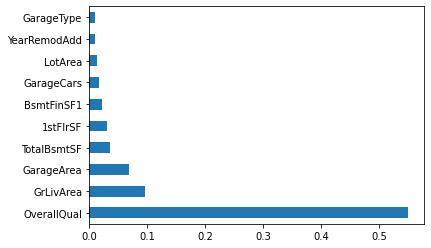

In [151]:
#As we do not have feature importance attribute in xgboost, lets use randomforestregressor to know the feature importance as this is remains same.
feat_importances = pd.Series(rfr.feature_importances_, index=x1_train.columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh')

In [152]:
feat_importances.sort_values(ascending=False)

OverallQual     0.549264
GrLivArea       0.095513
GarageArea      0.067847
TotalBsmtSF     0.035463
1stFlrSF        0.030929
BsmtFinSF1      0.022166
GarageCars      0.017465
LotArea         0.013400
YearRemodAdd    0.010013
GarageType      0.009312
dtype: float64

In [316]:
#Saving the MOdel

import joblib
file_name="HousePricePrediction.obj"
joblib.dump(RCV,open(file_name,'wb'))

Tried multiple cross validation and at cv=6 the RMSE value was very less compared to other cv values. Now its time to make the prediction on the actual given test set.

In [151]:
X_test.head() #Test data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.877042,-1.601803,0.766471,0.871865,0.058621,0.251762,-1.373107,-2.499530,0.0,-1.829688,-0.226126,1.473828,-0.037339,-8.026279,-0.403288,-0.549930,2.083791,-0.530217,1.130657,1.022389,1.919773,-1.690818,0.110058,0.472995,2.032104,0.539710,-0.759266,-0.974504,0.852451,-2.143012,-0.682975,-1.220382,-0.516039,1.739096,-0.320532,-0.285392,0.229925,1.947384,-3.430916,-0.897602,0.267506,-0.660509,1.728175,-0.793674,-0.125418,0.864283,1.101833,-0.235213,0.793082,-0.770138,0.141492,-0.209883,-0.394851,0.911999,-0.752203,0.588509,-0.931654,-0.774863,0.299883,-1.587938,1.641710,0.928931,0.314266,0.295349,0.291828,0.648616,0.066916,-0.364375,-0.125172,-0.273377,-0.076845,-19.015842,0.472132,-4.704992,-0.087131,0.244236,-0.605487,-1.523231,-1.591064
1,1.508301,-1.601803,-0.123578,-0.890240,0.058621,0.251762,-1.373107,0.318473,0.0,-1.220661,-0.226126,1.473828,-0.037339,-8.026279,2.985495,-0.549930,1.364138,-0.530217,0.433732,-0.036511,-0.483544,-1.690818,-1.181882,-1.260660,0.395209,-0.558343,-0.759266,-0.974504,-0.557836,-0.570258,-0.682975,-1.855589,-0.516039,1.278522,-0.320532,-0.285392,-0.858718,0.359446,-3.430916,0.246314,0.267506,-0.660509,0.636028,-0.793674,-0.125418,-0.179264,1.101833,-0.235213,-1.019676,-0.770138,-2.306850,-0.209883,-0.394851,-1.591444,-0.752203,0.588509,-2.637252,-0.774863,0.253303,0.095867,0.299850,0.411147,0.314266,0.295349,0.291828,-0.263323,-0.701705,-0.364375,-0.125172,-0.273377,-0.076845,-19.015842,0.472132,-4.704992,-0.087131,0.616647,0.899213,-4.612004,-3.390060
2,-0.877042,-1.601803,-0.123578,0.517649,0.058621,0.251762,0.752055,0.318473,0.0,0.606420,-0.226126,-1.355831,-0.037339,-8.026279,-0.403288,-0.549930,1.364138,-0.530217,0.997909,0.781730,1.919773,-1.690818,0.110058,0.472995,0.395209,-0.558343,-0.759266,-0.974504,0.852451,-0.570258,-0.682975,-1.855589,1.260625,-0.961639,-0.320532,-0.285392,2.634289,1.565102,-3.430916,-0.897602,0.267506,-0.660509,1.499981,-0.793674,-0.125418,0.646244,-0.816112,-0.235213,0.793082,-0.770138,0.141492,-0.209883,-2.796862,0.286138,-0.752203,0.588509,1.626744,-0.774863,0.291010,0.095867,0.299850,0.210564,0.314266,0.295349,0.291828,0.838933,1.574016,-0.364375,-0.125172,-0.273377,-0.076845,-19.015842,0.472132,-4.704992,-0.087131,-0.128176,0.899213,-1.523231,-1.591064
3,0.315629,-1.601803,0.331368,0.544562,0.058621,0.251762,0.752055,-3.908531,0.0,0.606420,-0.226126,-1.189380,-0.037339,-8.026279,-0.403288,1.030838,0.644484,1.249361,-0.993306,-1.672992,-0.483544,-1.690818,-0.858897,-0.682775,0.395209,-0.558343,0.671093,-0.974504,-0.557836,1.002496,-0.682975,0.685241,0.816459,-0.367002,-0.320532,-0.285392,-0.313284,-0.807756,-3.430916,-0.897602,0.267506,-0.660509,-0.811112,0.808117,-0.125418,0.242407,-0.816112,-0.235213,-1.019676,1.211186,0.141492,-0.209883,-1.595857,0.286138,-0.752203,0.588509,-0.931654,-0.774863,0.157927,0.937770,-1.042009,-1.132877,0.314266,0.295349,0.291828,-0.762907,-0.701705,-0.364375,-0.125172,-0.273377,-0.076845,-19.015842,0.472132,-4.704992,-0.087131,0.244236,0.899213,-1.523231,-1.591064
4,0.077095,-1.601803,0.766471,0.932603,0.058621,0.251762,-1.373107,0.318473,0.0,-1.220661,-0.226126,1.307378,-1.185010,-8.026279,-0.4032

In [317]:
#Load the Model
fitted_model=joblib.load(open('HousePricePrediction.obj', 'rb'))

In [318]:
fitted_model

RandomizedSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,


In [319]:
#Make predictions on test data
ypred=fitted_model.predict(X_test)
ypred

array([12.65573  , 12.18853  , 12.408755 , 12.115383 , 12.119281 ,
       11.306071 , 11.769027 , 12.610262 , 12.282191 , 11.997364 ,
       10.910131 , 11.748984 , 11.555492 , 12.090096 , 12.531086 ,
       11.593773 , 11.5911045, 11.616539 , 12.000977 , 12.189135 ,
       12.024657 , 11.839615 , 11.863384 , 11.07728  , 11.446569 ,
       11.80519  , 12.033464 , 11.817683 , 11.886254 , 11.378761 ,
       11.857696 , 12.143694 , 12.348805 , 11.941778 , 11.459879 ,
       12.002553 , 12.078715 , 11.600378 , 11.910194 , 11.852501 ,
       11.468283 , 12.548471 , 12.190557 , 12.131237 , 11.737838 ,
       11.656808 , 11.67564  , 11.450583 , 12.205897 , 12.614547 ,
       11.786833 , 12.11481  , 11.397284 , 11.348672 , 12.53163  ,
       11.796461 , 11.832838 , 12.120055 , 11.526437 , 12.384151 ,
       11.430426 , 12.061622 , 11.770857 , 11.876947 , 12.2107525,
       11.394921 , 11.883239 , 12.281569 , 11.842968 , 11.986403 ,
       12.6501255, 11.934388 , 12.093179 , 11.8978   , 11.7745

In [320]:
#Converting the predicted value to a dataframe
ypred=pd.DataFrame({'Id':data_test['Id'], 'SalePrice_Pred':ypred})
ypred.head()

,Id,SalePrice_Pred
0,337,12.655730
1,1018,12.188530
2,929,12.408755
3,1148,12.115383
4,1227,12.119281


In [321]:
#Saving the file in a CSV file
ypred.to_csv('xgbhousepred.csv', header=True, index=False)